https://www.kaggle.com/competitions/jpx-tokyo-stock-exchange-prediction/overview

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Understanding and Preparation

### trades.csv

In [ ]:
df_trades = pd.read_csv('trades.csv')
df_trades

,Date,StartDate,EndDate,Section,TotalSales,TotalPurchases,TotalTotal,TotalBalance,ProprietarySales,ProprietaryPurchases,...,CityBKsRegionalBKsEtcTotal,CityBKsRegionalBKsEtcBalance,TrustBanksSales,TrustBanksPurchases,TrustBanksTotal,TrustBanksBalance,OtherFinancialInstitutionsSales,OtherFinancialInstitutionsPurchases,OtherFinancialInstitutionsTotal,OtherFinancialInstitutionsBalance
0,2017-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707,2021-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1708,2021-12-02,2021-11-22,2021-11-26,Growth Market (Mothers/JASDAQ),1.143466e+09,1.143923e+09,2.287389e+09,456677.0,3.663919e+07,3.496068e+07,...,396230.0,-275608.0,6696755.0,6886122.0,13582877.0,189367.0,234653.0,298525.0,533178.0,63872.0
1709,2021-12-02,2021-11-22,2021-11-26,Prime Market (First Section),1.138343e+10,1.137621e+10,2.275964e+10,-7214179.0,1.499660e+09,1.230944e+09,...,35957940.0,-17510292.0,254580089.0,261919512.0,516499601.0,7339423.0,11959898.0,16368287.0,28328185.0,4408389.0
1710,2021-12-02,2021-11-22,2021-11-26,Standard Market (Second Section),1.069969e+08,1.075036e+08,2.145004e+08,506702.0,2.811025e+06,3.273163e+06,...,42127.0,-42127.0,438928.0,243817.0,682745.0,-195111.0,60291.0,6985.0,67276.0,-53306.0


In [ ]:
df_trades.columns

Index(['Date', 'StartDate', 'EndDate', 'Section', 'TotalSales',
       'TotalPurchases', 'TotalTotal', 'TotalBalance', 'ProprietarySales',
       'ProprietaryPurchases', 'ProprietaryTotal', 'ProprietaryBalance',
       'BrokerageSales', 'BrokeragePurchases', 'BrokerageTotal',
       'BrokerageBalance', 'IndividualsSales', 'IndividualsPurchases',
       'IndividualsTotal', 'IndividualsBalance', 'ForeignersSales',
       'ForeignersPurchases', 'ForeignersTotal', 'ForeignersBalance',
       'SecuritiesCosSales', 'SecuritiesCosPurchases', 'SecuritiesCosTotal',
       'SecuritiesCosBalance', 'InvestmentTrustsSales',
       'InvestmentTrustsPurchases', 'InvestmentTrustsTotal',
       'InvestmentTrustsBalance', 'BusinessCosSales', 'BusinessCosPurchases',
       'BusinessCosTotal', 'BusinessCosBalance', 'OtherInstitutionsSales',
       'OtherInstitutionsPurchases', 'OtherInstitutionsTotal',
       'OtherInstitutionsBalance', 'InsuranceCosSales',
       'InsuranceCosPurchases', 'InsuranceCosTot

### stock_list.csv

In [ ]:
df_stock_list = pd.read_csv('stock_list.csv')
df_stock_list

,SecuritiesCode,EffectiveDate,Name,Section/Products,NewMarketSegment,33SectorCode,33SectorName,17SectorCode,17SectorName,NewIndexSeriesSizeCode,NewIndexSeriesSize,TradeDate,Close,IssuedShares,MarketCapitalization,Universe0
0,1301,20211230,"KYOKUYO CO.,LTD.",First Section (Domestic),Prime Market,50,"Fishery, Agriculture and Forestry",1,FOODS,7,TOPIX Small 2,20211230.0,3080.0,1.092828e+07,3.365911e+10,True
1,1305,20211230,Daiwa ETF-TOPIX,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2097.0,3.634636e+09,7.621831e+12,False
2,1306,20211230,NEXT FUNDS TOPIX Exchange Traded Fund,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2073.5,7.917718e+09,1.641739e+13,False
3,1308,20211230,Nikko Exchange Traded Index Fund TOPIX,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2053.0,3.736943e+09,7.671945e+12,False
4,1309,20211230,NEXT FUNDS ChinaAMC SSE50 Index Exchange Trade...,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,44280.0,7.263200e+04,3.216145e+09,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4412,9994,20211230,YAMAYA CORPORATION,First Section (Domestic),Standard Market,6100,Retail Trade,14,RETAIL TRADE,7,TOPIX Small 2,20211230.0,2447.0,1.084787e+07,2.654474e+10,True
4413,9995,20211230,"GLOSEL Co.,Ltd.",First Section (Domestic),Prime Market,6050,Wholesale Trade,13,COMMERCIAL & WHOLESALE TRADE,7,TOPIX Small 2,20211230.0,410.0,2.642680e+07,1.083499e+10,False
4414,9996,20211230,"Satoh&Co.,Ltd.",JASDAQ(Standard / Domestic),Standard Market,6050,Wholesale Trade,13,COMMERCIAL & WHOLESALE TRADE,-,-,20211230.0,1488.0,9.152640e+06,1.361913e+10,False
4415,9997,20211230,"BELLUNA CO.,LTD.",First Section (Domestic),Prime Market,6100,Retail Trade,14,RETAIL TRADE,6,TOPIX Small 1,20211230.0,709.0,9.724447e+07,6.894633e+10,True


In [ ]:
df_stock_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4417 entries, 0 to 4416
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SecuritiesCode          4417 non-null   int64  
 1   EffectiveDate           4417 non-null   int64  
 2   Name                    4417 non-null   object 
 3   Section/Products        4417 non-null   object 
 4   NewMarketSegment        3772 non-null   object 
 5   33SectorCode            4417 non-null   object 
 6   33SectorName            4417 non-null   object 
 7   17SectorCode            4417 non-null   object 
 8   17SectorName            4417 non-null   object 
 9   NewIndexSeriesSizeCode  4417 non-null   object 
 10  NewIndexSeriesSize      4417 non-null   object 
 11  TradeDate               4121 non-null   float64
 12  Close                   4121 non-null   float64
 13  IssuedShares            4121 non-null   float64
 14  MarketCapitalization    4121 non-null   

In [ ]:
df_stock_list[df_stock_list['33SectorCode']=='-'].sort_values(by='MarketCapitalization', ascending = False).head(10)

,SecuritiesCode,EffectiveDate,Name,Section/Products,NewMarketSegment,33SectorCode,33SectorName,17SectorCode,17SectorName,NewIndexSeriesSizeCode,NewIndexSeriesSize,TradeDate,Close,IssuedShares,MarketCapitalization,Universe0
137,1557,20211230,SPDR S&P500 ETF Trust,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,54920.0,9.503321e+08,5.219224e+13,False
2,1306,20211230,NEXT FUNDS TOPIX Exchange Traded Fund,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2073.5,7.917718e+09,1.641739e+13,False
10,1321,20211230,NEXT FUNDS Nikkei 225 Exchange Traded Fund,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,29770.0,2.675735e+08,7.965662e+12,False
3,1308,20211230,Nikko Exchange Traded Index Fund TOPIX,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2053.0,3.736943e+09,7.671945e+12,False
1,1305,20211230,Daiwa ETF-TOPIX,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2097.0,3.634636e+09,7.621831e+12,False
15,1326,20211230,SPDR Gold Shares,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,19330.0,3.357000e+08,6.489081e+12,False
18,1330,20211230,Nikko Exchange Traded Index Fund 225,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,29775.0,1.299783e+08,3.870104e+12,False
9,1320,20211230,Daiwa ETF-Nikkei 225,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,29725.0,1.289106e+08,3.831866e+12,False
24,1348,20211230,MAXIS TOPIX ETF,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2073.5,1.185037e+09,2.457175e+12,False
23,1346,20211230,MAXIS NIKKEI225 ETF,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,29910.0,6.475605e+07,1.936854e+12,False


In [ ]:
df_stock_list[df_stock_list['33SectorCode']!='-'].sort_values(by='MarketCapitalization', ascending = False)

,SecuritiesCode,EffectiveDate,Name,Section/Products,NewMarketSegment,33SectorCode,33SectorName,17SectorCode,17SectorName,NewIndexSeriesSizeCode,NewIndexSeriesSize,TradeDate,Close,IssuedShares,MarketCapitalization,Universe0
3065,7203,20211230,TOYOTA MOTOR CORPORATION,First Section (Domestic),Prime Market,3700,Transportation Equipment,6,AUTOMOBILES & TRANSPORTATION EQUIPMENT,1,TOPIX Core30,20211230.0,2105.5,1.631499e+10,3.435121e+13,True
2804,6758,20211230,SONY GROUP CORPORATION,First Section (Domestic),Prime Market,3650,Electric Appliances,9,ELECTRIC APPLIANCES & PRECISION INSTRUMENTS,1,TOPIX Core30,20211230.0,14475.0,1.261082e+09,1.825416e+13,True
2867,6861,20211230,KEYENCE CORPORATION,First Section (Domestic),Prime Market,3650,Electric Appliances,9,ELECTRIC APPLIANCES & PRECISION INSTRUMENTS,1,TOPIX Core30,20211230.0,72280.0,2.432077e+08,1.757905e+13,True
2375,6098,20211230,"Recruit Holdings Co.,Ltd.",First Section (Domestic),Prime Market,9050,Services,10,"IT & SERVICES, OTHERS",1,TOPIX Core30,20211230.0,6972.0,1.695960e+09,1.182423e+13,True
4158,9432,20211230,NIPPON TELEGRAPH AND TELEPHONE CORPORATION,First Section (Domestic),Prime Market,5250,Information & Communication,10,"IT & SERVICES, OTHERS",1,TOPIX Core30,20211230.0,3150.0,3.622013e+09,1.140934e+13,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,9681,20000101,TOKYO DOME CORPORATION,First Section (Domestic),NaN,9050,Services,10,"IT & SERVICES, OTHERS",6,TOPIX Small 1,NaN,NaN,NaN,NaN,False
4286,9747,20000101,ASATSU-DK INC.,First Section (Domestic),NaN,9050,Services,10,"IT & SERVICES, OTHERS",4,TOPIX Mid400,NaN,NaN,NaN,NaN,False
4311,9792,20000101,"NICHIIGAKKAN CO.,LTD.",First Section (Domestic),NaN,9050,Services,10,"IT & SERVICES, OTHERS",6,TOPIX Small 1,NaN,NaN,NaN,NaN,False
4386,9957,20000101,SHOWA SHELL SEKIYU K.K.,First Section (Domestic),NaN,6050,Wholesale Trade,13,COMMERCIAL & WHOLESALE TRADE,-,-,NaN,NaN,NaN,NaN,False


In [ ]:
top10_code = df_stock_list[df_stock_list['33SectorCode']!='-'].sort_values(by='MarketCapitalization', ascending = False).head(10)['SecuritiesCode'].to_list()
top10_code

[7203, 6758, 6861, 6098, 9432, 8035, 9984, 4063, 8306, 6594]

In [ ]:
top10_name = df_stock_list[df_stock_list['33SectorCode']!='-'].sort_values(by='MarketCapitalization', ascending = False).head(10)['Name'].to_list()
top10_name

['TOYOTA MOTOR CORPORATION',
 'SONY GROUP CORPORATION',
 'KEYENCE CORPORATION',
 'Recruit Holdings Co.,Ltd.',
 'NIPPON TELEGRAPH AND TELEPHONE CORPORATION',
 'Tokyo Electron Limited',
 'SoftBank Group Corp.',
 'Shin-Etsu Chemical Co.,Ltd.',
 'Mitsubishi UFJ Financial Group,Inc.',
 'NIDEC CORPORATION']

In [ ]:
top10 = dict(zip(top10_code, top10_name))
top10

{4063: 'Shin-Etsu Chemical Co.,Ltd.',
 6098: 'Recruit Holdings Co.,Ltd.',
 6594: 'NIDEC CORPORATION',
 6758: 'SONY GROUP CORPORATION',
 6861: 'KEYENCE CORPORATION',
 7203: 'TOYOTA MOTOR CORPORATION',
 8035: 'Tokyo Electron Limited',
 8306: 'Mitsubishi UFJ Financial Group,Inc.',
 9432: 'NIPPON TELEGRAPH AND TELEPHONE CORPORATION',
 9984: 'SoftBank Group Corp.'}

### financials.csv

In [ ]:
df_financials = pd.read_csv('financials.csv')
df_financials

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (14,15,16,17,18,19,42,44) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,DisclosureNumber,DateCode,Date,SecuritiesCode,DisclosedDate,DisclosedTime,DisclosedUnixTime,TypeOfDocument,CurrentPeriodEndDate,TypeOfCurrentPeriod,...,ForecastEarningsPerShare,ApplyingOfSpecificAccountingOfTheQuarterlyFinancialStatements,MaterialChangesInSubsidiaries,ChangesBasedOnRevisionsOfAccountingStandard,ChangesOtherThanOnesBasedOnRevisionsOfAccountingStandard,ChangesInAccountingEstimates,RetrospectiveRestatement,NumberOfIssuedAndOutstandingSharesAtTheEndOfFiscalYearIncludingTreasuryStock,NumberOfTreasuryStockAtTheEndOfFiscalYear,AverageNumberOfShares
0,2.016121e+13,20170104_2753,2017-01-04,2753.0,2017-01-04,07:30:00,1.483483e+09,3QFinancialStatements_Consolidated_JP,2016-12-31,3Q,...,319.76,NaN,False,True,False,False,False,6848800.0,－,6848800.0
1,2.017010e+13,20170104_3353,2017-01-04,3353.0,2017-01-04,15:00:00,1.483510e+09,3QFinancialStatements_Consolidated_JP,2016-11-30,3Q,...,485.36,NaN,False,True,False,False,False,2035000.0,118917,1916083.0
2,2.016123e+13,20170104_4575,2017-01-04,4575.0,2017-01-04,12:00:00,1.483499e+09,ForecastRevision,2016-12-31,2Q,...,-93.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.017010e+13,20170105_2659,2017-01-05,2659.0,2017-01-05,15:00:00,1.483596e+09,3QFinancialStatements_Consolidated_JP,2016-11-30,3Q,...,285.05,NaN,False,True,False,False,False,31981654.0,18257,31963405.0
4,2.017011e+13,20170105_3050,2017-01-05,3050.0,2017-01-05,15:30:00,1.483598e+09,ForecastRevision,2017-02-28,FY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92951,2.021112e+13,20211203_6040,2021-12-03,6040.0,2021-12-03,15:00:00,1.638511e+09,1QFinancialStatements_Consolidated_JP,2021-10-31,1Q,...,－,NaN,False,True,False,False,False,16000400.0,836400,15164000.0
92952,2.021120e+13,20211203_6898,2021-12-03,6898.0,2021-12-03,16:00:00,1.638515e+09,3QFinancialStatements_Consolidated_JP,2021-10-31,3Q,...,142.01,NaN,False,False,False,False,False,816979.0,157541,659486.0
92953,2.021120e+13,20211203_6969,2021-12-03,6969.0,2021-12-03,15:00:00,1.638511e+09,ForecastRevision,2022-03-31,FY,...,-147.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92954,2.021112e+13,20211203_8057,2021-12-03,8057.0,2021-12-03,17:00:00,1.638518e+09,1QFinancialStatements_Consolidated_JP,2021-10-20,1Q,...,330.92,NaN,False,True,False,False,False,10419371.0,614032,9805339.0


In [ ]:
df_financials.columns

Index(['DisclosureNumber', 'DateCode', 'Date', 'SecuritiesCode',
       'DisclosedDate', 'DisclosedTime', 'DisclosedUnixTime', 'TypeOfDocument',
       'CurrentPeriodEndDate', 'TypeOfCurrentPeriod',
       'CurrentFiscalYearStartDate', 'CurrentFiscalYearEndDate', 'NetSales',
       'OperatingProfit', 'OrdinaryProfit', 'Profit', 'EarningsPerShare',
       'TotalAssets', 'Equity', 'EquityToAssetRatio', 'BookValuePerShare',
       'ResultDividendPerShare1stQuarter', 'ResultDividendPerShare2ndQuarter',
       'ResultDividendPerShare3rdQuarter',
       'ResultDividendPerShareFiscalYearEnd', 'ResultDividendPerShareAnnual',
       'ForecastDividendPerShare1stQuarter',
       'ForecastDividendPerShare2ndQuarter',
       'ForecastDividendPerShare3rdQuarter',
       'ForecastDividendPerShareFiscalYearEnd',
       'ForecastDividendPerShareAnnual', 'ForecastNetSales',
       'ForecastOperatingProfit', 'ForecastOrdinaryProfit', 'ForecastProfit',
       'ForecastEarningsPerShare',
       'ApplyingOf

### stock_prices.csv

In [ ]:
df_stock_prices = pd.read_csv('stock_prices.csv')
df_stock_prices

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026
...,...,...,...,...,...,...,...,...,...,...,...,...
2332526,20211203_9990,2021-12-03,9990,514.0,528.0,513.0,528.0,44200,1.0,NaN,False,0.034816
2332527,20211203_9991,2021-12-03,9991,782.0,794.0,782.0,794.0,35900,1.0,NaN,False,0.025478
2332528,20211203_9993,2021-12-03,9993,1690.0,1690.0,1645.0,1645.0,7200,1.0,NaN,False,-0.004302
2332529,20211203_9994,2021-12-03,9994,2388.0,2396.0,2380.0,2389.0,6500,1.0,NaN,False,0.009098


In [ ]:
df_stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332531 entries, 0 to 2332530
Data columns (total 12 columns):
 #   Column            Dtype  
---  ------            -----  
 0   RowId             object 
 1   Date              object 
 2   SecuritiesCode    int64  
 3   Open              float64
 4   High              float64
 5   Low               float64
 6   Close             float64
 7   Volume            int64  
 8   AdjustmentFactor  float64
 9   ExpectedDividend  float64
 10  SupervisionFlag   bool   
 11  Target            float64
dtypes: bool(1), float64(7), int64(2), object(2)
memory usage: 198.0+ MB


In [ ]:
df_stock_prices[df_stock_prices['SecuritiesCode'] == 1301]

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1865,20170105_1301,2017-01-05,1301,2743.0,2747.0,2735.0,2738.0,17900,1.0,NaN,False,0.002920
3730,20170106_1301,2017-01-06,1301,2734.0,2744.0,2720.0,2740.0,19900,1.0,NaN,False,-0.001092
5595,20170110_1301,2017-01-10,1301,2745.0,2754.0,2735.0,2748.0,24200,1.0,NaN,False,-0.005100
7460,20170111_1301,2017-01-11,1301,2748.0,2752.0,2737.0,2745.0,9300,1.0,NaN,False,-0.003295
...,...,...,...,...,...,...,...,...,...,...,...,...
2322531,20211129_1301,2021-11-29,1301,2975.0,2984.0,2951.0,2951.0,14300,1.0,NaN,False,0.003793
2324531,20211130_1301,2021-11-30,1301,2953.0,2997.0,2900.0,2900.0,20500,1.0,NaN,False,0.007558
2326531,20211201_1301,2021-12-01,1301,2909.0,2936.0,2909.0,2911.0,10600,1.0,NaN,False,0.016706
2328531,20211202_1301,2021-12-02,1301,2949.0,2973.0,2933.0,2933.0,15200,1.0,NaN,False,-0.003689


### Merging df_stock_prices and df_stock_info(df_stock_list)

In [ ]:
df_stock_info = df_stock_list[df_stock_list.columns[:11]]

In [ ]:
df_merge = df_stock_prices.merge(df_stock_info, how='left', on='SecuritiesCode')

In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2332531 entries, 0 to 2332530
Data columns (total 22 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   RowId                   object 
 1   Date                    object 
 2   SecuritiesCode          int64  
 3   Open                    float64
 4   High                    float64
 5   Low                     float64
 6   Close                   float64
 7   Volume                  int64  
 8   AdjustmentFactor        float64
 9   ExpectedDividend        float64
 10  SupervisionFlag         bool   
 11  Target                  float64
 12  EffectiveDate           int64  
 13  Name                    object 
 14  Section/Products        object 
 15  NewMarketSegment        object 
 16  33SectorCode            object 
 17  33SectorName            object 
 18  17SectorCode            object 
 19  17SectorName            object 
 20  NewIndexSeriesSizeCode  object 
 21  NewIndexSeriesSize      object 

In [ ]:
df_merge = df_merge.drop(['AdjustmentFactor', 'ExpectedDividend', 'SupervisionFlag', 'EffectiveDate'], axis=1)

In [ ]:
df_merge.to_csv('df_merge.csv', index_label=False)

In [ ]:
df_merge = pd.read_csv('df_merge.csv')
df_merge

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,Target,Name,Section/Products,NewMarketSegment,33SectorCode,33SectorName,17SectorCode,17SectorName,NewIndexSeriesSizeCode,NewIndexSeriesSize
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,0.000730,"KYOKUYO CO.,LTD.",First Section (Domestic),Prime Market,50,"Fishery, Agriculture and Forestry",1,FOODS,7,TOPIX Small 2
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,0.012324,"Nippon Suisan Kaisha,Ltd.",First Section (Domestic),Prime Market,50,"Fishery, Agriculture and Forestry",1,FOODS,4,TOPIX Mid400
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,0.006154,Maruha Nichiro Corporation,First Section (Domestic),Prime Market,50,"Fishery, Agriculture and Forestry",1,FOODS,4,TOPIX Mid400
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,0.011053,"KANEKO SEEDS CO.,LTD.",First Section (Domestic),Standard Market,50,"Fishery, Agriculture and Forestry",1,FOODS,7,TOPIX Small 2
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,0.003026,SAKATA SEED CORPORATION,First Section (Domestic),Prime Market,50,"Fishery, Agriculture and Forestry",1,FOODS,6,TOPIX Small 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332526,20211203_9990,2021-12-03,9990,514.0,528.0,513.0,528.0,44200,0.034816,SAC'S BAR HOLDINGS INC.,First Section (Domestic),Prime Market,6100,Retail Trade,14,RETAIL TRADE,7,TOPIX Small 2
2332527,20211203_9991,2021-12-03,9991,782.0,794.0,782.0,794.0,35900,0.025478,GECOSS CORPORATION,First Section (Domestic),Prime Market,6050,Wholesale Trade,13,COMMERCIAL & WHOLESALE TRADE,7,TOPIX Small 2
2332528,20211203_9993,2021-12-03,9993,1690.0,1690.0,1645.0,1645.0,7200,-0.004302,"YAMAZAWA CO.,LTD.",First Section (Domestic),Standard Market,6100,Retail Trade,14,RETAIL TRADE,7,TOPIX Small 2
2332529,20211203_9994,2021-12-03,9994,2388.0,2396.0,2380.0,2389.0,6500,0.009098,YAMAYA CORPORATION,First Section (Domestic),Standard Market,6100,Retail Trade,14,RETAIL TRADE,7,TOPIX Small 2


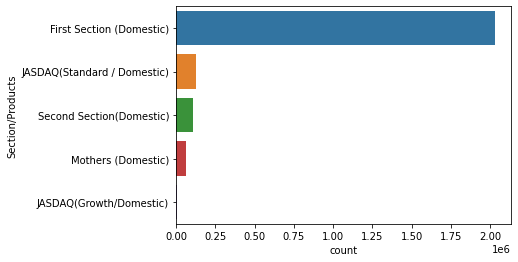

In [ ]:
sns.countplot(data=df_merge, y='Section/Products')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65289 missing from current font.
  font.set_text(s, 0, flags=flags)


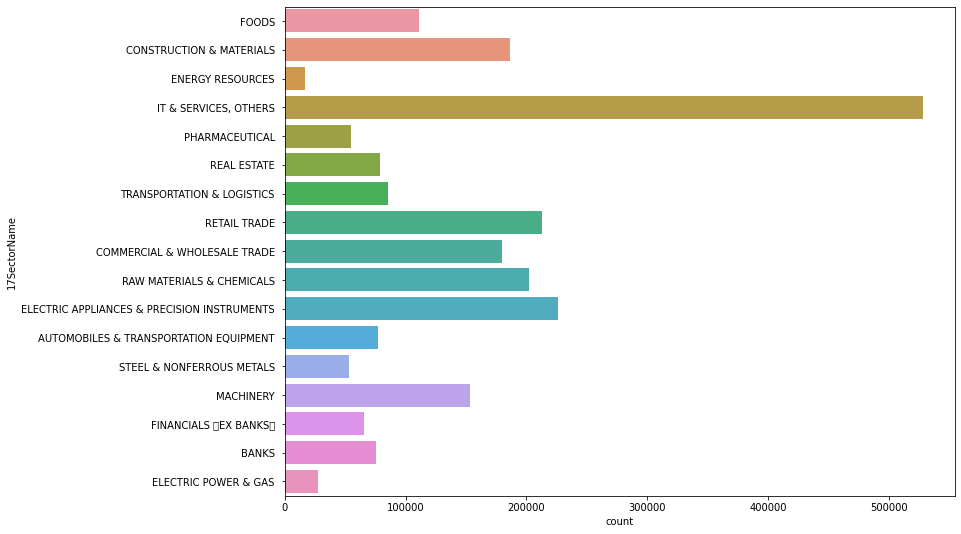

In [ ]:
plt.figure(figsize=(12,9))
sns.countplot(data=df_merge, y='17SectorName')

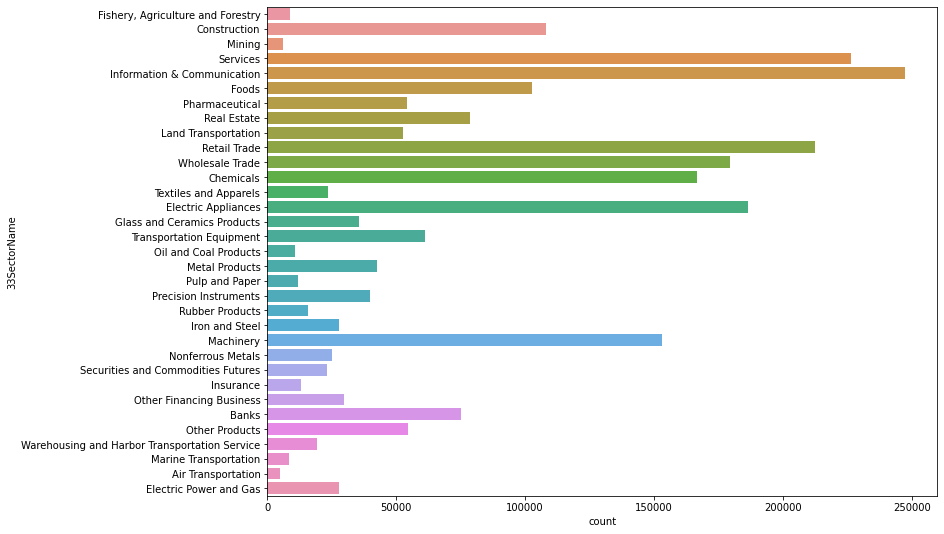

In [ ]:
plt.figure(figsize=(12,9))
sns.countplot(data=df_merge, y='33SectorName')

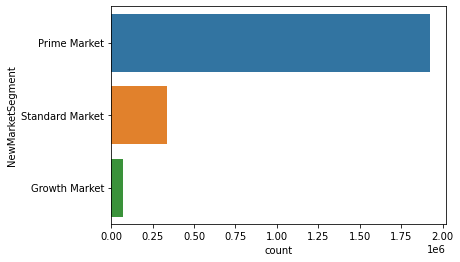

In [ ]:
sns.countplot(data=df_merge, y='NewMarketSegment')

In [ ]:
def convert_rate(rate):
    """ return the positive to nagative  """
    if rate >= 0:
        return 1
    else: return 0

In [ ]:
df_merge['Target_NP'] = df_merge['Target'].apply(convert_rate)

In [ ]:
df_6758 = df_merge[df_merge['SecuritiesCode'] == 6758][list(df_merge.columns[3:9]) + [df_merge.columns[-1]]]
df_6758

,Open,High,Low,Close,Volume,Target,Target_NP
1096,3305.0,3333.0,3274.0,3333.0,5914000,0.006068,1
2961,3335.0,3337.0,3269.0,3296.0,7201700,0.023522,1
4826,3328.0,3374.0,3311.0,3316.0,8873600,0.034178,1
6691,3345.0,3439.0,3344.0,3394.0,11461200,0.006268,1
8556,3464.0,3550.0,3462.0,3510.0,13620000,0.004813,1
...,...,...,...,...,...,...,...
2323715,13720.0,14070.0,13720.0,13750.0,3887700,0.005063,1
2325715,13900.0,14195.0,13820.0,13825.0,6036200,-0.022670,0
2327715,13760.0,13945.0,13670.0,13895.0,4317300,0.018041,1
2329715,13680.0,13775.0,13470.0,13580.0,4460300,-0.010488,0


In [ ]:
df_6758.to_csv('df_6758.csv', index_label=False)

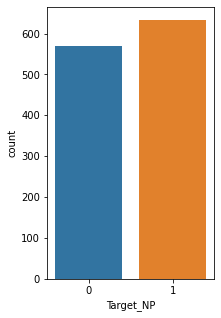

In [ ]:
plt.figure(figsize=(3,5))
sns.countplot(data=df_6758, x='Target_NP')

### Get the top 10 MarketCapitalization companey (from stock_list.csv) stock price to csv

In [ ]:
df_merge = pd.read_csv('df_merge.csv')
df_merge

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,Target,Name,Section/Products,NewMarketSegment,33SectorCode,33SectorName,17SectorCode,17SectorName,NewIndexSeriesSizeCode,NewIndexSeriesSize
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,0.000730,"KYOKUYO CO.,LTD.",First Section (Domestic),Prime Market,50,"Fishery, Agriculture and Forestry",1,FOODS,7,TOPIX Small 2
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,0.012324,"Nippon Suisan Kaisha,Ltd.",First Section (Domestic),Prime Market,50,"Fishery, Agriculture and Forestry",1,FOODS,4,TOPIX Mid400
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,0.006154,Maruha Nichiro Corporation,First Section (Domestic),Prime Market,50,"Fishery, Agriculture and Forestry",1,FOODS,4,TOPIX Mid400
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,0.011053,"KANEKO SEEDS CO.,LTD.",First Section (Domestic),Standard Market,50,"Fishery, Agriculture and Forestry",1,FOODS,7,TOPIX Small 2
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,0.003026,SAKATA SEED CORPORATION,First Section (Domestic),Prime Market,50,"Fishery, Agriculture and Forestry",1,FOODS,6,TOPIX Small 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332526,20211203_9990,2021-12-03,9990,514.0,528.0,513.0,528.0,44200,0.034816,SAC'S BAR HOLDINGS INC.,First Section (Domestic),Prime Market,6100,Retail Trade,14,RETAIL TRADE,7,TOPIX Small 2
2332527,20211203_9991,2021-12-03,9991,782.0,794.0,782.0,794.0,35900,0.025478,GECOSS CORPORATION,First Section (Domestic),Prime Market,6050,Wholesale Trade,13,COMMERCIAL & WHOLESALE TRADE,7,TOPIX Small 2
2332528,20211203_9993,2021-12-03,9993,1690.0,1690.0,1645.0,1645.0,7200,-0.004302,"YAMAZAWA CO.,LTD.",First Section (Domestic),Standard Market,6100,Retail Trade,14,RETAIL TRADE,7,TOPIX Small 2
2332529,20211203_9994,2021-12-03,9994,2388.0,2396.0,2380.0,2389.0,6500,0.009098,YAMAYA CORPORATION,First Section (Domestic),Standard Market,6100,Retail Trade,14,RETAIL TRADE,7,TOPIX Small 2


In [ ]:
def convert_rate(rate):
    """ return the positive to nagative  """
    if rate >= 0:
        return 1
    else: return 0

In [ ]:
df_merge['Target_NP'] = df_merge['Target'].apply(convert_rate)

In [ ]:
top10

{4063: 'Shin-Etsu Chemical Co.,Ltd.',
 6098: 'Recruit Holdings Co.,Ltd.',
 6594: 'NIDEC CORPORATION',
 6758: 'SONY GROUP CORPORATION',
 6861: 'KEYENCE CORPORATION',
 7203: 'TOYOTA MOTOR CORPORATION',
 8035: 'Tokyo Electron Limited',
 8306: 'Mitsubishi UFJ Financial Group,Inc.',
 9432: 'NIPPON TELEGRAPH AND TELEPHONE CORPORATION',
 9984: 'SoftBank Group Corp.'}

In [ ]:
top10_code

[7203, 6758, 6861, 6098, 9432, 8035, 9984, 4063, 8306, 6594]

In [ ]:
top10_df = top10.copy()
top10_df

{4063: 'Shin-Etsu Chemical Co.,Ltd.',
 6098: 'Recruit Holdings Co.,Ltd.',
 6594: 'NIDEC CORPORATION',
 6758: 'SONY GROUP CORPORATION',
 6861: 'KEYENCE CORPORATION',
 7203: 'TOYOTA MOTOR CORPORATION',
 8035: 'Tokyo Electron Limited',
 8306: 'Mitsubishi UFJ Financial Group,Inc.',
 9432: 'NIPPON TELEGRAPH AND TELEPHONE CORPORATION',
 9984: 'SoftBank Group Corp.'}

In [ ]:
for i in top10_code:
  df_merge[df_merge['SecuritiesCode'] == i][list(df_merge.columns[3:9]) + [df_merge.columns[-1]]].to_csv(f'{i}.csv', index_label=False)

#### Combining 10 csv files into a dictionary

In [ ]:
for i in top10_code:
  top10_df[i] = pd.read_csv(f'{i}.csv')

In [ ]:
top10_df[7203]

,Open,High,Low,Close,Volume,Target,Target_NP
1209,7010.0,7103.0,6975.0,7097.0,9547600,-0.016882,0
3074,7090.0,7091.0,7023.0,7049.0,7644000,-0.009957,0
4939,6840.0,6948.0,6830.0,6930.0,11586100,0.007433,1
6804,6922.0,6958.0,6861.0,6861.0,8931100,-0.009693,0
8669,6899.0,6924.0,6875.0,6912.0,6605300,0.005405,1
...,...,...,...,...,...,...,...
2323846,2031.0,2041.0,2005.0,2012.0,27978900,0.022239,1
2325846,2051.5,2061.5,1999.0,2001.0,42639000,0.000000,1
2327846,2007.5,2074.0,2007.0,2045.5,25290500,0.016377,1
2329846,2030.0,2051.0,2005.0,2045.5,24357000,-0.006253,0


# Using only one company to train the model (Without Date)

## Modeling

Using 7203 Toyota as the input data to build the models

The accuracy of KNN (K=1) is 0.515, (K=21) is 0.534

The accuracy of Decision Tree Classifier and Random Forest are 0.52

ANN just simply predict 1 for the output of all data points



### Import and Split the Dataset

In [ ]:
df_Toyota = pd.read_csv('7203.csv')

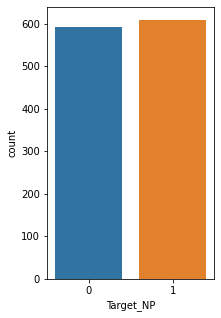

In [ ]:
plt.figure(figsize=(3,5))
sns.countplot(data=df_Toyota, x='Target_NP')

In [ ]:
df_Toyota['Target_NP'].value_counts()

1    609
0    593
Name: Target_NP, dtype: int64

In [ ]:
df_Toyota['Target_NP'].value_counts(normalize=True)

1    0.506656
0    0.493344
Name: Target_NP, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df_Toyota.dropna().drop(['Target_NP', 'Target'], axis=1)
y = df_Toyota.dropna()['Target_NP']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
x_train.shape

(840, 5)

In [ ]:
x_test.shape

(361, 5)

In [ ]:
y_test.shape

(361,)

In [ ]:
y_test.value_counts(normalize=True)

1    0.520776
0    0.479224
Name: Target_NP, dtype: float64

### K-Nearest Neighbors (KNN)

#### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

#### Build the model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(scaled_x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

#### Evaluation

K = 1, accuracy = 0.515 

In [ ]:
y_pred = knn_model.predict(scaled_x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [ ]:
accuracy_score(y_test, y_pred)

0.5152354570637119

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.48      0.49       173
           1       0.53      0.55      0.54       188

    accuracy                           0.52       361
   macro avg       0.51      0.51      0.51       361
weighted avg       0.51      0.52      0.51       361



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


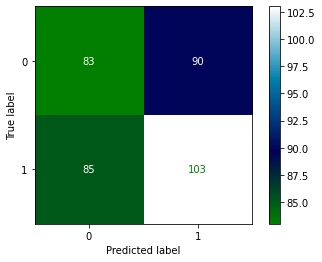

In [ ]:
plot_confusion_matrix(knn_model, scaled_x_test, y_test, cmap='ocean')

#### Elbow Method

K = 21, accuracy = 0.534

In [ ]:
test_error_rates = []

for k in range(1,31):
  knn_modelx = KNeighborsClassifier(n_neighbors=k)
  knn_modelx.fit(scaled_x_train, y_train)
  y_predx = knn_modelx.predict(scaled_x_test)
  test_error_rates += [(1-accuracy_score(y_test, y_predx))]

Text(0.5, 0, 'K Neighbors')

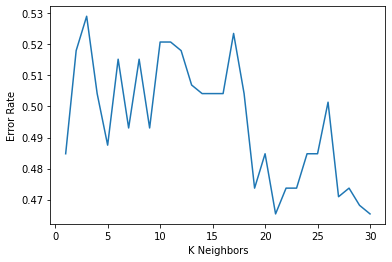

In [ ]:
plt.plot(range(1,31), test_error_rates)
plt.ylabel('Error Rate')
plt.xlabel('K Neighbors')

In [ ]:
knn_model21 = KNeighborsClassifier(n_neighbors=21)
knn_model21.fit(scaled_x_train, y_train)
y_pred21 = knn_model21.predict(scaled_x_test)

0.5346260387811634
              precision    recall  f1-score   support

           0       0.51      0.53      0.52       173
           1       0.55      0.54      0.55       188

    accuracy                           0.53       361
   macro avg       0.53      0.53      0.53       361
weighted avg       0.54      0.53      0.53       361



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


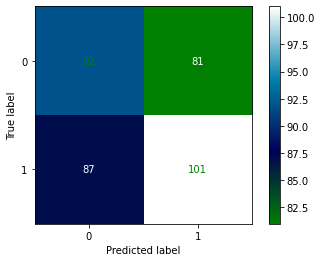

In [ ]:
print(accuracy_score(y_test, y_pred21))

print(classification_report(y_test, y_pred21))

plot_confusion_matrix(knn_model21, scaled_x_test, y_test, cmap='ocean')

### Decision Tree Classifier Model

#### Create the Decision Tree Classifier Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(x_train, y_train)
base_preds = tree_clf.predict(x_test)

In [ ]:
base_preds

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,

#### Display the result

In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [ ]:
print(classification_report(y_test, base_preds))

              precision    recall  f1-score   support

           0       0.49      0.47      0.48       173
           1       0.53      0.56      0.55       188

    accuracy                           0.52       361
   macro avg       0.51      0.51      0.51       361
weighted avg       0.51      0.52      0.51       361



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


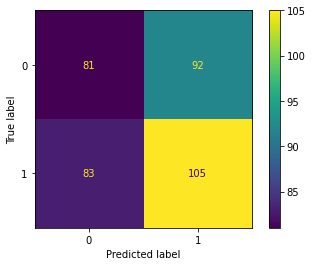

In [ ]:
plot_confusion_matrix(tree_clf, x_test, y_test)

In [ ]:
tree_clf.feature_importances_

array([0.21178868, 0.16506845, 0.21019487, 0.20391828, 0.20902973])

In [ ]:
pd.DataFrame(index = x.columns, data = tree_clf.feature_importances_, columns = ['feature_importances'])

,feature_importances
Open,0.211789
High,0.165068
Low,0.210195
Close,0.203918
Volume,0.209030


#### Grid Search for max_depth of Decision Tree

In [ ]:
x = top10_df[7203].dropna().drop(['Target_NP', 'Target'], axis=1)
y = top10_df[7203].dropna()['Target_NP']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
model = DecisionTreeClassifier()
tree_depth = list(range(1,30))
param_grid = {'max_depth': tree_depth}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_model = GridSearchCV(model, param_grid, scoring='accuracy', cv=10, verbose=1)

In [ ]:
grid_model.fit(x_train, y_train)

Fitting 10 folds for each of 29 candidates, totalling 290 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_model.best_estimator_

DecisionTreeClassifier(max_depth=15)

In [ ]:
final_model = DecisionTreeClassifier(max_depth=15)
final_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=15)

In [ ]:
y_pred_f = final_model.predict(x_test)

##### Display the result

In [ ]:
print(classification_report(y_test, y_pred_f))

              precision    recall  f1-score   support

           0       0.50      0.52      0.51       173
           1       0.54      0.52      0.53       188

    accuracy                           0.52       361
   macro avg       0.52      0.52      0.52       361
weighted avg       0.52      0.52      0.52       361



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


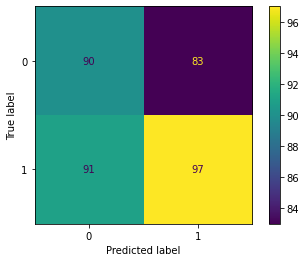

In [ ]:
plot_confusion_matrix(final_model, x_test, y_test)

In [ ]:
final_model.feature_importances_

array([0.20204557, 0.14471627, 0.17802419, 0.18613399, 0.28907998])

In [ ]:
pd.DataFrame(index = x.columns, data = final_model.feature_importances_, columns = ['feature_importances'])

,feature_importances
Open,0.202046
High,0.144716
Low,0.178024
Close,0.186134
Volume,0.289080


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rforest_model = RandomForestClassifier(n_estimators=10, max_features='auto', random_state=101)

In [ ]:
rforest_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [ ]:
y_pred = rforest_model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.58      0.53       173
           1       0.54      0.46      0.50       188

    accuracy                           0.52       361
   macro avg       0.52      0.52      0.51       361
weighted avg       0.52      0.52      0.51       361



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


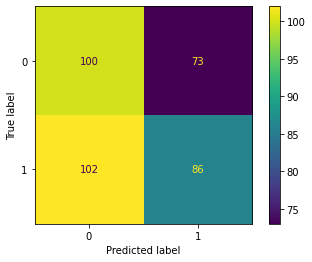

In [ ]:
plot_confusion_matrix(rforest_model, x_test, y_test)

### Artificial Neural Network(ANN) for binary classification

#### Normal ANN

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x_train)

X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(5, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
model.fit(x=X_train, y=y_train, batch_size=64, epochs=500, validation_data=(X_test, y_test))

Epoch 1/500
14/14 [==============================] - 1s 15ms/step - loss: 0.6931 - val_loss: 0.6932
Epoch 2/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6930 - val_loss: 0.6933
Epoch 3/500
14/14 [==============================] - 0s 3ms/step - loss: 0.6930 - val_loss: 0.6933
Epoch 4/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6930 - val_loss: 0.6934
Epoch 5/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6930 - val_loss: 0.6934
Epoch 6/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6930 - val_loss: 0.6934
Epoch 7/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6930 - val_loss: 0.6934
Epoch 8/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6929 - val_loss: 0.6934
Epoch 9/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6929 - val_loss: 0.6935
Epoch 10/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6929 - val_loss: 0.6934
Epoch 11

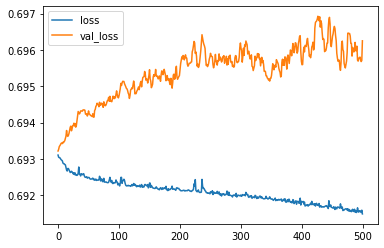

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

#### EarlyStopping

In [ ]:
model = Sequential()

model.add(Dense(5, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
model.fit(x=X_train, y=y_train, batch_size=64, epochs=500, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/500
14/14 [==============================] - 1s 13ms/step - loss: 0.6928 - val_loss: 0.6942
Epoch 2/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6928 - val_loss: 0.6941
Epoch 3/500
14/14 [==============================] - 0s 3ms/step - loss: 0.6928 - val_loss: 0.6941
Epoch 4/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6928 - val_loss: 0.6940
Epoch 5/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6928 - val_loss: 0.6939
Epoch 6/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6928 - val_loss: 0.6939
Epoch 7/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6928 - val_loss: 0.6940
Epoch 8/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6928 - val_loss: 0.6940
Epoch 9/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6928 - val_loss: 0.6941
Epoch 10/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6928 - val_loss: 0.6941
Epoch 11

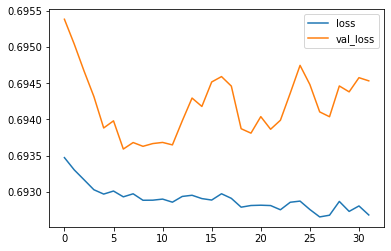

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

#### Dropout Layers + EarlyStopping

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()

model.add(Dense(5, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
model.fit(x=X_train, y=y_train, batch_size=64, epochs=500, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/500
14/14 [==============================] - 1s 13ms/step - loss: 0.6982 - val_loss: 0.6954
Epoch 2/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6987 - val_loss: 0.6942
Epoch 3/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6937 - val_loss: 0.6935
Epoch 4/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6945 - val_loss: 0.6933
Epoch 5/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6927 - val_loss: 0.6932
Epoch 6/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6921 - val_loss: 0.6933
Epoch 7/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6911 - val_loss: 0.6934
Epoch 8/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6949 - val_loss: 0.6933
Epoch 9/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6950 - val_loss: 0.6928
Epoch 10/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6949 - val_loss: 0.6927
Epoch 11

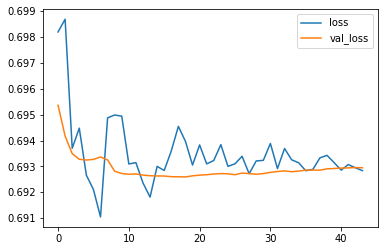

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

#### Predict the test data and evaluate the model(Dropout + EarlyStopping)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred = (y_pred > 0.5)

In [ ]:
y_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[  0, 173],
       [  0, 188]])

In [ ]:
accuracy_score(y_test, y_pred)

0.5207756232686981

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 5)                 30        
                                                                 
 dropout_2 (Dropout)         (None, 5)                 0         
                                                                 
 dense_16 (Dense)            (None, 2)                 12        
                                                                 
 dropout_3 (Dropout)         (None, 2)                 0         
                                                                 
 dense_17 (Dense)            (None, 1)                 3         
                                                                 
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


## Using other stock (how many? n)to evaluate the model 

In [ ]:
df_stock_list = pd.read_csv('stock_list.csv')

# df_merge = pd.read_csv('df_merge.csv')

# def convert_rate(rate):
#     """ return the positive to nagative  """
#     if rate >= 0:
#         return 1
#     else: return 0

# df_merge['Target_NP'] = df_merge['Target'].apply(convert_rate)

df_merge = pd.read_csv('df_merge_date.csv')


In [ ]:
n = 25

topn_code = df_stock_list[df_stock_list['33SectorCode']!='-'].sort_values(by='MarketCapitalization', ascending = False).head(n)['SecuritiesCode'].to_list()
topn_name = df_stock_list[df_stock_list['33SectorCode']!='-'].sort_values(by='MarketCapitalization', ascending = False).head(n)['Name'].to_list()

topn = dict(zip(topn_code, topn_name))

topn_df = topn.copy()

for i in topn_code:
  topn_df[i] = df_merge[df_merge['SecuritiesCode'] == i][list(df_merge.columns[3:9]) + [df_merge.columns[-1]]]


len(topn_df)

25

In [ ]:
topn_name

['TOYOTA MOTOR CORPORATION',
 'SONY GROUP CORPORATION',
 'KEYENCE CORPORATION',
 'Recruit Holdings Co.,Ltd.',
 'NIPPON TELEGRAPH AND TELEPHONE CORPORATION',
 'Tokyo Electron Limited',
 'SoftBank Group Corp.',
 'Shin-Etsu Chemical Co.,Ltd.',
 'Mitsubishi UFJ Financial Group,Inc.',
 'NIDEC CORPORATION',
 'KDDI CORPORATION',
 'DAIKIN INDUSTRIES,LTD.',
 'DENSO CORPORATION',
 'ORIENTAL LAND CO.,LTD.',
 'Nintendo Co.,Ltd.',
 'SoftBank Corp.',
 'FAST RETAILING CO.,LTD.',
 'HOYA CORPORATION',
 'CHUGAI PHARMACEUTICAL CO.,LTD.',
 'Murata Manufacturing Co.,Ltd.',
 'Hitachi,Ltd.',
 'HONDA MOTOR CO.,LTD.',
 'DAIICHI SANKYO COMPANY,LIMITED',
 'ITOCHU Corporation',
 'Mitsubishi Corporation']

In [ ]:
df_model_accuracy = pd.DataFrame(columns = ['SecuritiesCode', 'Name', 'accuracy_KNN', 'accuracy_DT', 'accuracy_RF'])

for i in topn_code[1:]:
  x_t = topn_df[i].dropna().drop(['Target_NP', 'Target'], axis=1)
  y_t = topn_df[i].dropna()['Target_NP']
  
  y_t_pred_k = knn_model21.predict(x_t)
  y_t_pred_d = tree_clf.predict(x_t)
  y_t_pred_r = rforest_model.predict(x_t)


  new_row = {'SecuritiesCode':i, 'Name':topn[i], 'accuracy_KNN':round(accuracy_score(y_t, y_t_pred_k), 4), 'accuracy_DT':round(accuracy_score(y_t, y_t_pred_d), 4), 'accuracy_RF':round(accuracy_score(y_t, y_t_pred_r), 4)}

  df_model_accuracy = df_model_accuracy.append(new_row, ignore_index=True)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names

In [ ]:
df_model_accuracy

,SecuritiesCode,Name,accuracy_KNN,accuracy_DT,accuracy_RF
0,6758,SONY GROUP CORPORATION,0.5262,0.4788,0.4796
1,6861,KEYENCE CORPORATION,0.4954,0.4879,0.4879
2,6098,"Recruit Holdings Co.,Ltd.",0.5329,0.4663,0.4946
3,9432,NIPPON TELEGRAPH AND TELEPHONE CORPORATION,0.5129,0.4871,0.4963
4,8035,Tokyo Electron Limited,0.5312,0.4688,0.4688
5,9984,SoftBank Group Corp.,0.5021,0.4938,0.4838
6,4063,"Shin-Etsu Chemical Co.,Ltd.",0.5096,0.5112,0.5079
7,8306,"Mitsubishi UFJ Financial Group,Inc.",0.4879,0.4879,0.4879
8,6594,NIDEC CORPORATION,0.5254,0.4838,0.4763
9,9433,KDDI CORPORATION,0.5062,0.4971,0.5004


In [ ]:
df_model_accuracy[df_model_accuracy['accuracy_KNN'] == max(df_model_accuracy['accuracy_KNN'])]

,SecuritiesCode,Name,accuracy_KNN,accuracy_DT,accuracy_RF
13,7974,"Nintendo Co.,Ltd.",0.5495,0.4521,0.4521


In [ ]:
df_model_accuracy[df_model_accuracy['accuracy_DT'] == max(df_model_accuracy['accuracy_DT'])]

,SecuritiesCode,Name,accuracy_KNN,accuracy_DT,accuracy_RF
19,6501,"Hitachi,Ltd.",0.5046,0.5129,0.4971


In [ ]:
df_model_accuracy[df_model_accuracy['accuracy_RF'] == max(df_model_accuracy['accuracy_RF'])]

,SecuritiesCode,Name,accuracy_KNN,accuracy_DT,accuracy_RF
14,9434,SoftBank Corp.,0.5112,0.5084,0.5112


# Using only one company to train the model (With Date)

## Create new features about Date

In [ ]:
df_merge = pd.read_csv('df_merge.csv')
df_merge

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,Target,Name,Section/Products,NewMarketSegment,33SectorCode,33SectorName,17SectorCode,17SectorName,NewIndexSeriesSizeCode,NewIndexSeriesSize
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,0.000730,"KYOKUYO CO.,LTD.",First Section (Domestic),Prime Market,50,"Fishery, Agriculture and Forestry",1,FOODS,7,TOPIX Small 2
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,0.012324,"Nippon Suisan Kaisha,Ltd.",First Section (Domestic),Prime Market,50,"Fishery, Agriculture and Forestry",1,FOODS,4,TOPIX Mid400
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,0.006154,Maruha Nichiro Corporation,First Section (Domestic),Prime Market,50,"Fishery, Agriculture and Forestry",1,FOODS,4,TOPIX Mid400
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,0.011053,"KANEKO SEEDS CO.,LTD.",First Section (Domestic),Standard Market,50,"Fishery, Agriculture and Forestry",1,FOODS,7,TOPIX Small 2
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,0.003026,SAKATA SEED CORPORATION,First Section (Domestic),Prime Market,50,"Fishery, Agriculture and Forestry",1,FOODS,6,TOPIX Small 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332526,20211203_9990,2021-12-03,9990,514.0,528.0,513.0,528.0,44200,0.034816,SAC'S BAR HOLDINGS INC.,First Section (Domestic),Prime Market,6100,Retail Trade,14,RETAIL TRADE,7,TOPIX Small 2
2332527,20211203_9991,2021-12-03,9991,782.0,794.0,782.0,794.0,35900,0.025478,GECOSS CORPORATION,First Section (Domestic),Prime Market,6050,Wholesale Trade,13,COMMERCIAL & WHOLESALE TRADE,7,TOPIX Small 2
2332528,20211203_9993,2021-12-03,9993,1690.0,1690.0,1645.0,1645.0,7200,-0.004302,"YAMAZAWA CO.,LTD.",First Section (Domestic),Standard Market,6100,Retail Trade,14,RETAIL TRADE,7,TOPIX Small 2
2332529,20211203_9994,2021-12-03,9994,2388.0,2396.0,2380.0,2389.0,6500,0.009098,YAMAYA CORPORATION,First Section (Domestic),Standard Market,6100,Retail Trade,14,RETAIL TRADE,7,TOPIX Small 2


In [ ]:
df_merge['timeStamp'] = pd.to_datetime(df_merge['Date'])

In [ ]:
df_merge['Day'] = df_merge['timeStamp'].apply(lambda time: time.day)
df_merge['Month'] = df_merge['timeStamp'].apply(lambda time: time.month)
df_merge['Year'] = df_merge['timeStamp'].apply(lambda time: time.year)
df_merge['Quarter'] = df_merge['timeStamp'].apply(lambda time: time.quarter)
df_merge['Day of Week'] = df_merge['timeStamp'].apply(lambda time: time.dayofweek)

In [ ]:
def convert_rate(rate):
    """ return the positive to nagative  """
    if rate >= 0:
        return 1
    else: return 0

In [ ]:
df_merge['Target_NP'] = df_merge['Target'].apply(convert_rate)

In [ ]:
df_merge[df_merge.columns[-8:]]

,NewIndexSeriesSize,timeStamp,Day,Month,Year,Quarter,Day of Week,Target_NP
0,TOPIX Small 2,2017-01-04,4,1,2017,1,2,1
1,TOPIX Mid400,2017-01-04,4,1,2017,1,2,1
2,TOPIX Mid400,2017-01-04,4,1,2017,1,2,1
3,TOPIX Small 2,2017-01-04,4,1,2017,1,2,1
4,TOPIX Small 1,2017-01-04,4,1,2017,1,2,1
...,...,...,...,...,...,...,...,...
2332526,TOPIX Small 2,2021-12-03,3,12,2021,4,4,1
2332527,TOPIX Small 2,2021-12-03,3,12,2021,4,4,1
2332528,TOPIX Small 2,2021-12-03,3,12,2021,4,4,0
2332529,TOPIX Small 2,2021-12-03,3,12,2021,4,4,1


## Modeling

Using 7203 Toyota as the input data to build the models

The accuracy of KNN (K=1) is 0.51, (K=16) is 0.56

The accuracy of Decision Tree Classifier is 0.47

The accuracy of Random Forest is 0.50

ANN just simply predict 1 for the output of all data points



### Import and Split the Dataset

In [ ]:
# df_Toyota = df_merge[df_merge['SecuritiesCode'] == 7203][list(df_merge.columns[3:9]) + list(df_merge.columns[-6:])]
df_Toyota = pd.read_csv('7203_date.csv')
df_Toyota

,Open,High,Low,Close,Volume,Target,Day,Month,Year,Quarter,Day of Week,Target_NP
1209,7010.0,7103.0,6975.0,7097.0,9547600,-0.016882,4,1,2017,1,2,0
3074,7090.0,7091.0,7023.0,7049.0,7644000,-0.009957,5,1,2017,1,3,0
4939,6840.0,6948.0,6830.0,6930.0,11586100,0.007433,6,1,2017,1,4,1
6804,6922.0,6958.0,6861.0,6861.0,8931100,-0.009693,10,1,2017,1,1,0
8669,6899.0,6924.0,6875.0,6912.0,6605300,0.005405,11,1,2017,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2323846,2031.0,2041.0,2005.0,2012.0,27978900,0.022239,29,11,2021,4,0,1
2325846,2051.5,2061.5,1999.0,2001.0,42639000,0.000000,30,11,2021,4,1,1
2327846,2007.5,2074.0,2007.0,2045.5,25290500,0.016377,1,12,2021,4,2,1
2329846,2030.0,2051.0,2005.0,2045.5,24357000,-0.006253,2,12,2021,4,3,0


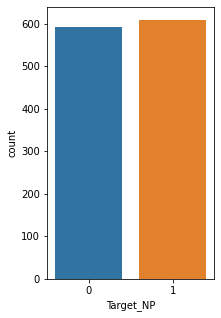

In [ ]:
plt.figure(figsize=(3,5))
sns.countplot(data=df_Toyota, x='Target_NP')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df_Toyota.dropna().drop(['Target_NP', 'Target'], axis=1)
y = df_Toyota.dropna()['Target_NP']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
x_train.shape

(840, 10)

In [ ]:
x_test.shape

(361, 10)

### K-Nearest Neighbors (KNN)

#### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

#### Build the model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(scaled_x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

#### Evaluation

K = 1, accuracy = 0.51

In [ ]:
y_pred = knn_model.predict(scaled_x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [ ]:
a_k1 = accuracy_score(y_test, y_pred)
a_k1

0.5096952908587258

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.55      0.52       173
           1       0.53      0.47      0.50       188

    accuracy                           0.51       361
   macro avg       0.51      0.51      0.51       361
weighted avg       0.51      0.51      0.51       361



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


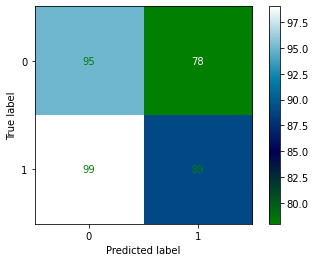

In [ ]:
plot_confusion_matrix(knn_model, scaled_x_test, y_test, cmap='ocean')

#### Elbow Method

K = 16 accuracy = 0.56

In [ ]:
test_error_rates = []

for k in range(1,31):
  knn_modelx = KNeighborsClassifier(n_neighbors=k)
  knn_modelx.fit(scaled_x_train, y_train)
  y_predx = knn_modelx.predict(scaled_x_test)
  test_error_rates += [(1-accuracy_score(y_test, y_predx))]

Text(0.5, 0, 'K Neighbors')

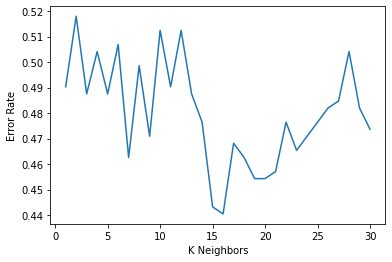

In [ ]:
plt.plot(range(1,31), test_error_rates)
plt.ylabel('Error Rate')
plt.xlabel('K Neighbors')

In [ ]:
knn_model21 = KNeighborsClassifier(n_neighbors=16)
knn_model21.fit(scaled_x_train, y_train)
y_pred21 = knn_model21.predict(scaled_x_test)

0.5595567867036011
              precision    recall  f1-score   support

           0       0.53      0.67      0.59       173
           1       0.60      0.46      0.52       188

    accuracy                           0.56       361
   macro avg       0.57      0.56      0.56       361
weighted avg       0.57      0.56      0.55       361



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


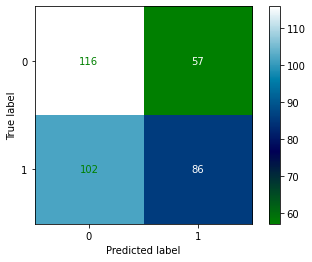

In [ ]:
a_kb = accuracy_score(y_test, y_pred21)

print(a_kb)

print(classification_report(y_test, y_pred21))

plot_confusion_matrix(knn_model21, scaled_x_test, y_test, cmap='ocean')

### Decision Tree Classifier Model

#### Create the Decision Tree Classifier Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(x_train, y_train)
base_preds = tree_clf.predict(x_test)

In [ ]:
base_preds

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

#### Display the result

In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [ ]:
a_dt = accuracy_score(y_test, base_preds)

print(classification_report(y_test, base_preds))

              precision    recall  f1-score   support

           0       0.46      0.45      0.46       173
           1       0.51      0.52      0.51       188

    accuracy                           0.49       361
   macro avg       0.49      0.49      0.49       361
weighted avg       0.49      0.49      0.49       361



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


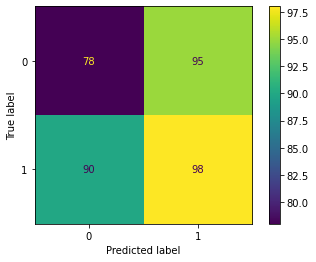

In [ ]:
plot_confusion_matrix(tree_clf, x_test, y_test)

In [ ]:
tree_clf.feature_importances_

array([0.08010393, 0.08065226, 0.13767367, 0.17747473, 0.21357887,
       0.14310321, 0.07118052, 0.02573507, 0.01875661, 0.05174113])

In [ ]:
pd.DataFrame(index = x.columns, data = tree_clf.feature_importances_, columns = ['feature_importances'])

,feature_importances
Open,0.080104
High,0.080652
Low,0.137674
Close,0.177475
Volume,0.213579
Day,0.143103
Month,0.071181
Year,0.025735
Quarter,0.018757
Day of Week,0.051741


#### Grid Search for max_depth of Decision Tree

In [ ]:
x = df_Toyota.dropna().drop(['Target_NP', 'Target'], axis=1)
y = df_Toyota.dropna()['Target_NP']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
model = DecisionTreeClassifier()
tree_depth = list(range(1,30))
param_grid = {'max_depth': tree_depth}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_model = GridSearchCV(model, param_grid, scoring='accuracy', cv=10, verbose=1)

In [ ]:
grid_model.fit(x_train, y_train)

Fitting 10 folds for each of 29 candidates, totalling 290 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_model.best_estimator_

DecisionTreeClassifier(max_depth=6)

In [ ]:
final_model = DecisionTreeClassifier(max_depth=6)
final_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [ ]:
y_pred_f = final_model.predict(x_test)

##### Display the result

In [ ]:
a_dt_f = accuracy_score(y_test, y_pred_f)

print(classification_report(y_test, y_pred_f))

              precision    recall  f1-score   support

           0       0.47      0.67      0.55       173
           1       0.49      0.29      0.37       188

    accuracy                           0.47       361
   macro avg       0.48      0.48      0.46       361
weighted avg       0.48      0.47      0.45       361



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


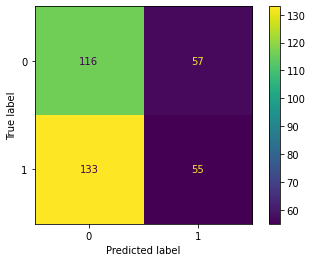

In [ ]:
plot_confusion_matrix(final_model, x_test, y_test)

In [ ]:
final_model.feature_importances_

array([0.07544043, 0.09236886, 0.16820212, 0.11202917, 0.34012327,
       0.10416149, 0.06802048, 0.00662602, 0.        , 0.03302815])

In [ ]:
pd.DataFrame(index = x.columns, data = final_model.feature_importances_, columns = ['feature_importances'])

,feature_importances
Open,0.075440
High,0.092369
Low,0.168202
Close,0.112029
Volume,0.340123
Day,0.104161
Month,0.068020
Year,0.006626
Quarter,0.000000
Day of Week,0.033028


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rforest_model = RandomForestClassifier(n_estimators=10, max_features='auto', random_state=101)

In [ ]:
rforest_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [ ]:
y_pred = rforest_model.predict(x_test)

In [ ]:
a_rf = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.58      0.53       173
           1       0.53      0.43      0.47       188

    accuracy                           0.50       361
   macro avg       0.50      0.50      0.50       361
weighted avg       0.51      0.50      0.50       361



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


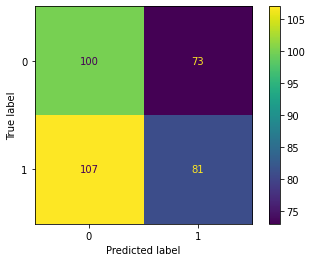

In [ ]:
plot_confusion_matrix(rforest_model, x_test, y_test)

### Artificial Neural Network(ANN) for binary classification

#### Normal ANN

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x_train)

X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(5, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
model.fit(x=X_train, y=y_train, batch_size=64, epochs=500, validation_data=(X_test, y_test))

Epoch 1/500
14/14 [==============================] - 1s 18ms/step - loss: 0.6923 - val_loss: 0.6930
Epoch 2/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6922 - val_loss: 0.6929
Epoch 3/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6922 - val_loss: 0.6930
Epoch 4/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6922 - val_loss: 0.6930
Epoch 5/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6921 - val_loss: 0.6930
Epoch 6/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6921 - val_loss: 0.6931
Epoch 7/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6921 - val_loss: 0.6931
Epoch 8/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6921 - val_loss: 0.6929
Epoch 9/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6920 - val_loss: 0.6928
Epoch 10/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6920 - val_loss: 0.6927
Epoch 11

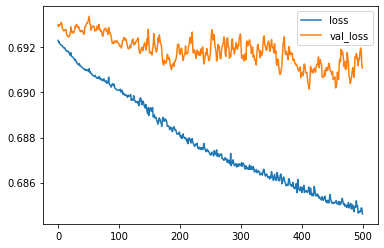

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

#### EarlyStopping

In [ ]:
model = Sequential()

model.add(Dense(5, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
model.fit(x=X_train, y=y_train, batch_size=64, epochs=500, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/500
14/14 [==============================] - 1s 14ms/step - loss: 0.6948 - val_loss: 0.6922
Epoch 2/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6945 - val_loss: 0.6921
Epoch 3/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6943 - val_loss: 0.6922
Epoch 4/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6941 - val_loss: 0.6924
Epoch 5/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6938 - val_loss: 0.6925
Epoch 6/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6937 - val_loss: 0.6927
Epoch 7/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6936 - val_loss: 0.6928
Epoch 8/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6935 - val_loss: 0.6928
Epoch 9/500
14/14 [==============================] - 0s 5ms/step - loss: 0.6935 - val_loss: 0.6928
Epoch 10/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6935 - val_loss: 0.6928
Epoch 11

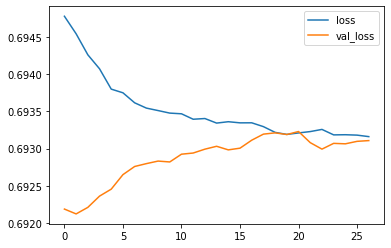

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

#### Dropout Layers + EarlyStopping

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()

model.add(Dense(5, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
model.fit(x=X_train, y=y_train, batch_size=64, epochs=500, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/500
14/14 [==============================] - 1s 15ms/step - loss: 1.0310 - val_loss: 0.7684
Epoch 2/500
14/14 [==============================] - 0s 5ms/step - loss: 0.9874 - val_loss: 0.7420
Epoch 3/500
14/14 [==============================] - 0s 5ms/step - loss: 0.9603 - val_loss: 0.7217
Epoch 4/500
14/14 [==============================] - 0s 6ms/step - loss: 0.8783 - val_loss: 0.7067
Epoch 5/500
14/14 [==============================] - 0s 5ms/step - loss: 0.8166 - val_loss: 0.6992
Epoch 6/500
14/14 [==============================] - 0s 5ms/step - loss: 0.8101 - val_loss: 0.6951
Epoch 7/500
14/14 [==============================] - 0s 4ms/step - loss: 0.8188 - val_loss: 0.6945
Epoch 8/500
14/14 [==============================] - 0s 5ms/step - loss: 0.7696 - val_loss: 0.6949
Epoch 9/500
14/14 [==============================] - 0s 5ms/step - loss: 0.7723 - val_loss: 0.6955
Epoch 10/500
14/14 [==============================] - 0s 5ms/step - loss: 0.7178 - val_loss: 0.6952
Epoch 11

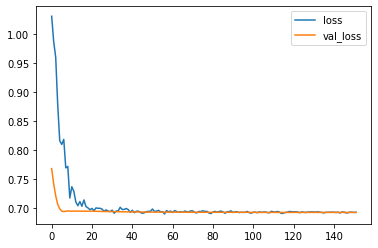

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

#### Predict the test data and evaluate the model(Dropout + EarlyStopping)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred = (y_pred > 0.5)

In [ ]:
y_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[  0, 173],
       [  0, 188]])

In [ ]:
a_nn = accuracy_score(y_test, y_pred)
a_nn

0.5207756232686981

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 55        
                                                                 
 dropout (Dropout)           (None, 5)                 0         
                                                                 
 dense_7 (Dense)             (None, 2)                 12        
                                                                 
 dropout_1 (Dropout)         (None, 2)                 0         
                                                                 
 dense_8 (Dense)             (None, 1)                 3         
                                                                 
Total params: 70
Trainable params: 70
Non-trainable params: 0
_________________________________________________________________


### Accuracy Table

In [ ]:
list_accuracy = [a_k1, a_kb, a_dt, a_dt_f, a_rf, a_nn]
list_model = ['K-Nearest Neighbors (K=1)', 'K-Nearest Neighbors (best)', 'Decision Tree (fully grown)', 'Decision Tree (pruned)', 'Random Forest', 'Artificial Neural Network']

dic_accuracy = dict(zip(list_model, list_accuracy))

df_accuracy = pd.DataFrame(dic_accuracy.items(), columns=['Model', 'Accuracy'])

In [ ]:
df_accuracy

,Model,Accuracy
0,K-Nearest Neighbors (K=1),0.509695
1,K-Nearest Neighbors (best),0.559557
2,Decision Tree (fully grown),0.487535
3,Decision Tree (pruned),0.473684
4,Random Forest,0.501385
5,Artificial Neural Network,0.520776


## Using other stock (how many? n)to evaluate the model 

In [ ]:
df_stock_list = pd.read_csv('stock_list.csv')

# df_merge = pd.read_csv('df_merge.csv')


# df_merge['timeStamp'] = pd.to_datetime(df_merge['Date'])

# df_merge['Day'] = df_merge['timeStamp'].apply(lambda time: time.day)
# df_merge['Month'] = df_merge['timeStamp'].apply(lambda time: time.month)
# df_merge['Year'] = df_merge['timeStamp'].apply(lambda time: time.year)
# df_merge['Quarter'] = df_merge['timeStamp'].apply(lambda time: time.quarter)
# df_merge['Day of Week'] = df_merge['timeStamp'].apply(lambda time: time.dayofweek)


# def convert_rate(rate):
#     """ return the positive to nagative  """
#     if rate >= 0:
#         return 1
#     else: return 0

# df_merge['Target_NP'] = df_merge['Target'].apply(convert_rate)

df_merge = pd.read_csv('df_merge_date.csv')


In [ ]:
n = 25

topn_code = df_stock_list[df_stock_list['33SectorCode']!='-'].sort_values(by='MarketCapitalization', ascending = False).head(n)['SecuritiesCode'].to_list()
topn_name = df_stock_list[df_stock_list['33SectorCode']!='-'].sort_values(by='MarketCapitalization', ascending = False).head(n)['Name'].to_list()

topn = dict(zip(topn_code, topn_name))

topn_df = topn.copy()

for i in topn_code:
  topn_df[i] = df_merge[df_merge['SecuritiesCode'] == i][list(df_merge.columns[3:9]) + list(df_merge.columns[-6:])]

len(topn_df)

25

In [ ]:
topn_name

['TOYOTA MOTOR CORPORATION',
 'SONY GROUP CORPORATION',
 'KEYENCE CORPORATION',
 'Recruit Holdings Co.,Ltd.',
 'NIPPON TELEGRAPH AND TELEPHONE CORPORATION',
 'Tokyo Electron Limited',
 'SoftBank Group Corp.',
 'Shin-Etsu Chemical Co.,Ltd.',
 'Mitsubishi UFJ Financial Group,Inc.',
 'NIDEC CORPORATION',
 'KDDI CORPORATION',
 'DAIKIN INDUSTRIES,LTD.',
 'DENSO CORPORATION',
 'ORIENTAL LAND CO.,LTD.',
 'Nintendo Co.,Ltd.',
 'SoftBank Corp.',
 'FAST RETAILING CO.,LTD.',
 'HOYA CORPORATION',
 'CHUGAI PHARMACEUTICAL CO.,LTD.',
 'Murata Manufacturing Co.,Ltd.',
 'Hitachi,Ltd.',
 'HONDA MOTOR CO.,LTD.',
 'DAIICHI SANKYO COMPANY,LIMITED',
 'ITOCHU Corporation',
 'Mitsubishi Corporation']

In [ ]:
df_model_accuracy = pd.DataFrame(columns = ['SecuritiesCode', 'Name', 'accuracy_KNN', 'accuracy_DT', 'accuracy_RF'])

for i in topn_code[1:]:
  x_t = topn_df[i].dropna().drop(['Target_NP', 'Target'], axis=1)
  y_t = topn_df[i].dropna()['Target_NP']
  
  y_t_pred_k = knn_model21.predict(x_t)
  y_t_pred_d = tree_clf.predict(x_t)
  y_t_pred_r = rforest_model.predict(x_t)


  new_row = {'SecuritiesCode':i, 'Name':topn[i], 'accuracy_KNN':round(accuracy_score(y_t, y_t_pred_k), 4), 'accuracy_DT':round(accuracy_score(y_t, y_t_pred_d), 4), 'accuracy_RF':round(accuracy_score(y_t, y_t_pred_r), 4)}

  df_model_accuracy = df_model_accuracy.append(new_row, ignore_index=True)

In [ ]:
df_model_accuracy

,SecuritiesCode,Name,accuracy_KNN,accuracy_DT,accuracy_RF
0,6758,SONY GROUP CORPORATION,0.5262,0.4904,0.4754
1,6861,KEYENCE CORPORATION,0.4896,0.4879,0.4879
2,6098,"Recruit Holdings Co.,Ltd.",0.5329,0.5162,0.4813
3,9432,NIPPON TELEGRAPH AND TELEPHONE CORPORATION,0.5129,0.4996,0.4813
4,8035,Tokyo Electron Limited,0.5304,0.4688,0.4721
5,9984,SoftBank Group Corp.,0.5021,0.5079,0.5129
6,4063,"Shin-Etsu Chemical Co.,Ltd.",0.5096,0.4963,0.4896
7,8306,"Mitsubishi UFJ Financial Group,Inc.",0.4879,0.5037,0.5396
8,6594,NIDEC CORPORATION,0.5254,0.4854,0.4854
9,9433,KDDI CORPORATION,0.5062,0.4954,0.4854


In [ ]:
df_model_accuracy[df_model_accuracy['accuracy_KNN'] == max(df_model_accuracy['accuracy_KNN'])]

,SecuritiesCode,Name,accuracy_KNN,accuracy_DT,accuracy_RF
13,7974,"Nintendo Co.,Ltd.",0.5479,0.4521,0.4555


In [ ]:
df_model_accuracy[df_model_accuracy['accuracy_DT'] == max(df_model_accuracy['accuracy_DT'])]

,SecuritiesCode,Name,accuracy_KNN,accuracy_DT,accuracy_RF
22,8001,ITOCHU Corporation,0.5362,0.5487,0.4854


In [ ]:
df_model_accuracy[df_model_accuracy['accuracy_RF'] == max(df_model_accuracy['accuracy_RF'])]

,SecuritiesCode,Name,accuracy_KNN,accuracy_DT,accuracy_RF
14,9434,SoftBank Corp.,0.5112,0.5028,0.5475


# Using whole dataset (2017~2020) to train the model

## Modeling

Using 60% of the whole dataset as the input data to build the models

The accuracy of KNN (K=1) is 0.60

The accuracy of Decision Tree Classifier is 0.60

The accuracy of Random Forest is 0.63



### Import and Split the Dataset

In [ ]:
df_merge_date = pd.read_csv('df_merge_date.csv')

df_all = df_merge_date[list(df_merge_date.columns[3:9]) + list(df_merge_date.columns[-6:])]
df_all

,Open,High,Low,Close,Volume,Target,Day,Month,Year,Quarter,Day of Week,Target_NP
0,2734.0,2755.0,2730.0,2742.0,31400,0.000730,4,1,2017,1,2,1
1,568.0,576.0,563.0,571.0,2798500,0.012324,4,1,2017,1,2,1
2,3150.0,3210.0,3140.0,3210.0,270800,0.006154,4,1,2017,1,2,1
3,1510.0,1550.0,1510.0,1550.0,11300,0.011053,4,1,2017,1,2,1
4,3270.0,3350.0,3270.0,3330.0,150800,0.003026,4,1,2017,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2332526,514.0,528.0,513.0,528.0,44200,0.034816,3,12,2021,4,4,1
2332527,782.0,794.0,782.0,794.0,35900,0.025478,3,12,2021,4,4,1
2332528,1690.0,1690.0,1645.0,1645.0,7200,-0.004302,3,12,2021,4,4,0
2332529,2388.0,2396.0,2380.0,2389.0,6500,0.009098,3,12,2021,4,4,1


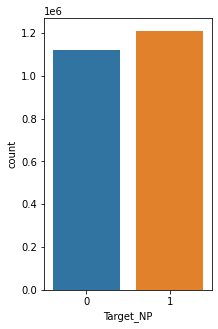

In [ ]:
plt.figure(figsize=(3,5))
sns.countplot(data=df_all, x='Target_NP')

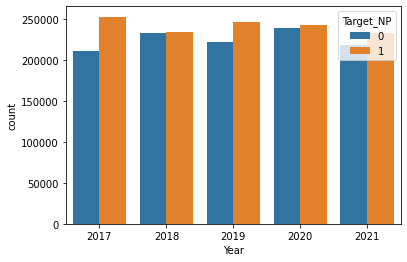

In [ ]:
sns.countplot(data=df_all, x='Year', hue='Target_NP')

In [ ]:
df_merge_date['SecuritiesCode'].nunique()

2000

In [ ]:
df_2021 = df_all[df_all['Year']==2021]
df_n2021 = df_all[df_all['Year']!=2021]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df_n2021.dropna().drop(['Target_NP', 'Target'], axis=1)
y = df_n2021.dropna()['Target_NP']

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.4, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_val, y_val, test_size=0.5, random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(1124395, 10)
(374798, 10)
(374799, 10)


### K-Nearest Neighbors (KNN)

#### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_x_train = scaler.fit_transform(x_train)
scaled_x_val = scaler.transform(x_val)
scaled_x_test = scaler.transform(x_test)

#### Build the model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(scaled_x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

#### Evaluation

K = 1, accuracy = 0.60

In [ ]:
y_pred = knn_model.predict(scaled_x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [ ]:
a_k1 = accuracy_score(y_test, y_pred)
a_k1

0.6047044007705484

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.59      0.59    180582
           1       0.62      0.62      0.62    194216

    accuracy                           0.60    374798
   macro avg       0.60      0.60      0.60    374798
weighted avg       0.60      0.60      0.60    374798



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


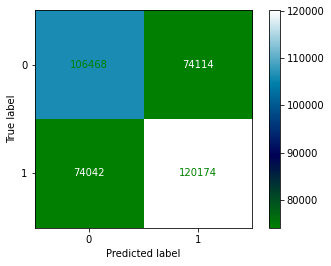

In [ ]:
plot_confusion_matrix(knn_model, scaled_x_test, y_test, cmap='ocean')

#### Elbow Method

K = 16 accuracy = 0.56

In [ ]:
test_error_rates = []

for k in range(1,31):
  knn_modelx = KNeighborsClassifier(n_neighbors=k)
  knn_modelx.fit(scaled_x_train, y_train)
  y_predx = knn_modelx.predict(scaled_x_test)
  test_error_rates += [(1-accuracy_score(y_test, y_predx))]

In [ ]:
plt.plot(range(1,31), test_error_rates)
plt.ylabel('Error Rate')
plt.xlabel('K Neighbors')

In [ ]:
knn_model21 = KNeighborsClassifier(n_neighbors=16)
knn_model21.fit(scaled_x_train, y_train)
y_pred21 = knn_model21.predict(scaled_x_test)

In [ ]:
a_kb = accuracy_score(y_test, y_pred21)

print(a_kb)

print(classification_report(y_test, y_pred21))

plot_confusion_matrix(knn_model21, scaled_x_test, y_test, cmap='ocean')

### Decision Tree Classifier Model

#### Create the Decision Tree Classifier Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(x_train, y_train)
base_preds = tree_clf.predict(x_test)

In [ ]:
base_preds

array([1, 0, 1, ..., 0, 1, 1])

#### Display the result

In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [ ]:
a_dt = accuracy_score(y_test, base_preds)

print(classification_report(y_test, base_preds))

              precision    recall  f1-score   support

           0       0.59      0.59      0.59    180582
           1       0.62      0.62      0.62    194216

    accuracy                           0.60    374798
   macro avg       0.60      0.60      0.60    374798
weighted avg       0.60      0.60      0.60    374798



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


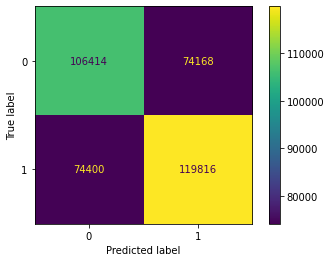

In [ ]:
plot_confusion_matrix(tree_clf, x_test, y_test)

In [ ]:
tree_clf.feature_importances_

array([0.13177435, 0.12612832, 0.12745286, 0.12822001, 0.28828988,
       0.07712889, 0.04535885, 0.02939369, 0.01700144, 0.0292517 ])

In [ ]:
pd.DataFrame(index = x.columns, data = tree_clf.feature_importances_, columns = ['feature_importances'])

,feature_importances
Open,0.131774
High,0.126128
Low,0.127453
Close,0.128220
Volume,0.288290
Day,0.077129
Month,0.045359
Year,0.029394
Quarter,0.017001
Day of Week,0.029252


#### Grid Search for max_depth of Decision Tree

In [ ]:
x = df_Toyota.dropna().drop(['Target_NP', 'Target'], axis=1)
y = df_Toyota.dropna()['Target_NP']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
model = DecisionTreeClassifier()
tree_depth = list(range(1,30))
param_grid = {'max_depth': tree_depth}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_model = GridSearchCV(model, param_grid, scoring='accuracy', cv=10, verbose=1)

In [ ]:
grid_model.fit(x_train, y_train)

Fitting 10 folds for each of 29 candidates, totalling 290 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_model.best_estimator_

DecisionTreeClassifier(max_depth=6)

In [ ]:
final_model = DecisionTreeClassifier(max_depth=6)
final_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [ ]:
y_pred_f = final_model.predict(x_test)

##### Display the result

In [ ]:
a_dt_f = accuracy_score(y_test, y_pred_f)

print(classification_report(y_test, y_pred_f))

              precision    recall  f1-score   support

           0       0.47      0.67      0.55       173
           1       0.49      0.29      0.37       188

    accuracy                           0.47       361
   macro avg       0.48      0.48      0.46       361
weighted avg       0.48      0.47      0.45       361



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


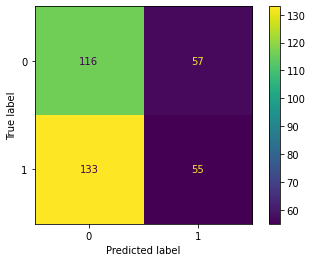

In [ ]:
plot_confusion_matrix(final_model, x_test, y_test)

In [ ]:
final_model.feature_importances_

array([0.07544043, 0.09236886, 0.16820212, 0.11202917, 0.34012327,
       0.10416149, 0.06802048, 0.00662602, 0.        , 0.03302815])

In [ ]:
pd.DataFrame(index = x.columns, data = final_model.feature_importances_, columns = ['feature_importances'])

,feature_importances
Open,0.075440
High,0.092369
Low,0.168202
Close,0.112029
Volume,0.340123
Day,0.104161
Month,0.068020
Year,0.006626
Quarter,0.000000
Day of Week,0.033028


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rforest_model = RandomForestClassifier(n_estimators=10, max_features='auto', random_state=101)

In [ ]:
rforest_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [ ]:
y_pred = rforest_model.predict(x_test)

In [ ]:
a_rf = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.66      0.64    180582
           1       0.66      0.61      0.63    194216

    accuracy                           0.63    374798
   macro avg       0.64      0.64      0.63    374798
weighted avg       0.64      0.63      0.63    374798



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


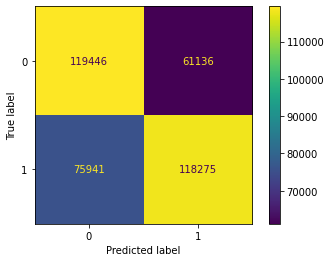

In [ ]:
plot_confusion_matrix(rforest_model, x_test, y_test)

### Artificial Neural Network(ANN) for binary classification

#### Normal ANN

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x_train)

X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(5, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
model.fit(x=X_train, y=y_train, batch_size=64, epochs=250, validation_data=(X_test, y_test))

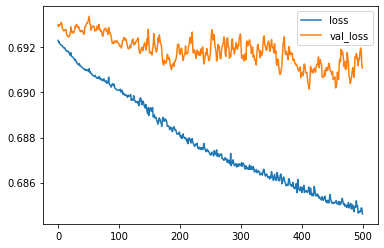

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

#### EarlyStopping

In [ ]:
model = Sequential()

model.add(Dense(5, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
model.fit(x=X_train, y=y_train, batch_size=64, epochs=250, validation_data=(X_test, y_test), callbacks=[early_stop])

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

#### Dropout Layers + EarlyStopping

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()

model.add(Dense(5, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
model.fit(x=X_train, y=y_train, batch_size=64, epochs=500, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/500
14/14 [==============================] - 1s 15ms/step - loss: 1.0310 - val_loss: 0.7684
Epoch 2/500
14/14 [==============================] - 0s 5ms/step - loss: 0.9874 - val_loss: 0.7420
Epoch 3/500
14/14 [==============================] - 0s 5ms/step - loss: 0.9603 - val_loss: 0.7217
Epoch 4/500
14/14 [==============================] - 0s 6ms/step - loss: 0.8783 - val_loss: 0.7067
Epoch 5/500
14/14 [==============================] - 0s 5ms/step - loss: 0.8166 - val_loss: 0.6992
Epoch 6/500
14/14 [==============================] - 0s 5ms/step - loss: 0.8101 - val_loss: 0.6951
Epoch 7/500
14/14 [==============================] - 0s 4ms/step - loss: 0.8188 - val_loss: 0.6945
Epoch 8/500
14/14 [==============================] - 0s 5ms/step - loss: 0.7696 - val_loss: 0.6949
Epoch 9/500
14/14 [==============================] - 0s 5ms/step - loss: 0.7723 - val_loss: 0.6955
Epoch 10/500
14/14 [==============================] - 0s 5ms/step - loss: 0.7178 - val_loss: 0.6952
Epoch 11

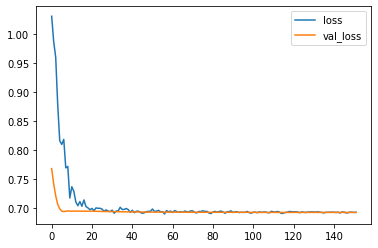

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

#### Predict the test data and evaluate the model(Dropout + EarlyStopping)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred = (y_pred > 0.5)

In [ ]:
y_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[  0, 173],
       [  0, 188]])

In [ ]:
a_nn = accuracy_score(y_test, y_pred)
a_nn

0.5207756232686981

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 55        
                                                                 
 dropout (Dropout)           (None, 5)                 0         
                                                                 
 dense_7 (Dense)             (None, 2)                 12        
                                                                 
 dropout_1 (Dropout)         (None, 2)                 0         
                                                                 
 dense_8 (Dense)             (None, 1)                 3         
                                                                 
Total params: 70
Trainable params: 70
Non-trainable params: 0
_________________________________________________________________


### Accuracy Table

In [ ]:
# list_accuracy = [a_k1, a_kb, a_dt, a_dt_f, a_rf, a_nn]
list_accuracy = [a_k1, None, a_dt, None, a_rf, None]

list_model = ['K-Nearest Neighbors (K=1)', 'K-Nearest Neighbors (best)', 'Decision Tree (fully grown)', 'Decision Tree (pruned)', 'Random Forest', 'Artificial Neural Network']

dic_accuracy = dict(zip(list_model, list_accuracy))

df_accuracy = pd.DataFrame(dic_accuracy.items(), columns=['Model', 'Accuracy'])

In [ ]:
df_accuracy

,Model,Accuracy
0,K-Nearest Neighbors (K=1),0.604704
1,K-Nearest Neighbors (best),NaN
2,Decision Tree (fully grown),0.603605
3,Decision Tree (pruned),NaN
4,Random Forest,0.634264
5,Artificial Neural Network,NaN


## Using df_2021 stock data (how many? n)to evaluate the model 

In [ ]:
df_stock_list = pd.read_csv('stock_list.csv')

df_merge = df_merge_date[df_merge_date['Year']==2021].copy()

In [ ]:
n = 30

topn_code = df_stock_list[df_stock_list['33SectorCode']!='-'].sort_values(by='MarketCapitalization', ascending = False).head(n)['SecuritiesCode'].to_list()
topn_name = df_stock_list[df_stock_list['33SectorCode']!='-'].sort_values(by='MarketCapitalization', ascending = False).head(n)['Name'].to_list()

topn = dict(zip(topn_code, topn_name))

topn_df = topn.copy()

for i in topn_code:
  topn_df[i] = df_merge[df_merge['SecuritiesCode'] == i][list(df_merge.columns[3:9]) + list(df_merge.columns[-6:])]

print(f'{len(topn_df)}\n')
topn_name

30



['TOYOTA MOTOR CORPORATION',
 'SONY GROUP CORPORATION',
 'KEYENCE CORPORATION',
 'Recruit Holdings Co.,Ltd.',
 'NIPPON TELEGRAPH AND TELEPHONE CORPORATION',
 'Tokyo Electron Limited',
 'SoftBank Group Corp.',
 'Shin-Etsu Chemical Co.,Ltd.',
 'Mitsubishi UFJ Financial Group,Inc.',
 'NIDEC CORPORATION',
 'KDDI CORPORATION',
 'DAIKIN INDUSTRIES,LTD.',
 'DENSO CORPORATION',
 'ORIENTAL LAND CO.,LTD.',
 'Nintendo Co.,Ltd.',
 'SoftBank Corp.',
 'FAST RETAILING CO.,LTD.',
 'HOYA CORPORATION',
 'CHUGAI PHARMACEUTICAL CO.,LTD.',
 'Murata Manufacturing Co.,Ltd.',
 'Hitachi,Ltd.',
 'HONDA MOTOR CO.,LTD.',
 'DAIICHI SANKYO COMPANY,LIMITED',
 'ITOCHU Corporation',
 'Mitsubishi Corporation',
 'Sumitomo Mitsui Financial Group,Inc.',
 'SMC CORPORATION',
 'Z Holdings Corporation',
 'Takeda Pharmaceutical Company Limited',
 'FANUC CORPORATION']

In [ ]:
df_model_accuracy = pd.DataFrame(columns = ['SecuritiesCode', 'Name', 'accuracy_KNN', 'accuracy_DT', 'accuracy_RF'])

for i in topn_code:
  x_t = topn_df[i].dropna().drop(['Target_NP', 'Target'], axis=1)
  y_t = topn_df[i].dropna()['Target_NP']
  
  y_t_pred_k = knn_model.predict(x_t)
  y_t_pred_d = tree_clf.predict(x_t)
  y_t_pred_r = rforest_model.predict(x_t)


  new_row = {'SecuritiesCode':i, 'Name':topn[i], 'accuracy_KNN':round(accuracy_score(y_t, y_t_pred_k), 4), 'accuracy_DT':round(accuracy_score(y_t, y_t_pred_d), 4), 'accuracy_RF':round(accuracy_score(y_t, y_t_pred_r), 4)}

  df_model_accuracy = df_model_accuracy.append(new_row, ignore_index=True)

In [ ]:
df_model_accuracy.sort_values(by='accuracy_RF', ascending = False)

,SecuritiesCode,Name,accuracy_KNN,accuracy_RF,accuracy_DT
14,7974,"Nintendo Co.,Ltd.",0.5177,0.5752,0.5221
20,6501,"Hitachi,Ltd.",0.5531,0.5531,0.5044
3,6098,"Recruit Holdings Co.,Ltd.",0.5265,0.5398,0.5265
5,8035,Tokyo Electron Limited,0.5575,0.5354,0.4735
10,9433,KDDI CORPORATION,0.4912,0.5265,0.4735
21,7267,"HONDA MOTOR CO.,LTD.",0.5133,0.5221,0.5088
18,4519,"CHUGAI PHARMACEUTICAL CO.,LTD.",0.4336,0.5177,0.4690
17,7741,HOYA CORPORATION,0.5354,0.5177,0.5487
26,6273,SMC CORPORATION,0.5221,0.5133,0.4779
11,6367,"DAIKIN INDUSTRIES,LTD.",0.5354,0.5133,0.5133


In [ ]:
df_model_accuracy[df_model_accuracy['accuracy_KNN'] == max(df_model_accuracy['accuracy_KNN'])]

,SecuritiesCode,Name,accuracy_KNN,accuracy_RF,accuracy_DT
1,6758,SONY GROUP CORPORATION,0.5575,0.4912,0.5265
5,8035,Tokyo Electron Limited,0.5575,0.5354,0.4735
24,8058,Mitsubishi Corporation,0.5575,0.4779,0.5310


In [ ]:
df_model_accuracy[df_model_accuracy['accuracy_RF'] == max(df_model_accuracy['accuracy_RF'])]

,SecuritiesCode,Name,accuracy_KNN,accuracy_RF,accuracy_DT
14,7974,"Nintendo Co.,Ltd.",0.5177,0.5752,0.5221


In [ ]:
df_model_accuracy[df_model_accuracy['accuracy_DT'] == max(df_model_accuracy['accuracy_DT'])]

,SecuritiesCode,Name,accuracy_KNN,accuracy_RF,accuracy_DT
17,7741,HOYA CORPORATION,0.5354,0.5177,0.5487


In [ ]:
# https://stackoverflow.com/questions/56107259/how-to-save-a-trained-model-by-scikit-learn
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
import pickle

# save the model to disk
filename = '2021_model_knn.sav'
pickle.dump(knn_model, open(filename, 'wb'))

filename = '2021_model_dt.sav'
pickle.dump(tree_clf, open(filename, 'wb'))

filename = '2021_model_rf.sav'
pickle.dump(rforest_model, open(filename, 'wb'))
 
# # some time later...
 
# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

# Using whole dataset (one month) to train the model

## Modeling

Using 60% of the whole dataset as the input data to build the models

The accuracy of KNN (K=1) is 0.61, (K=17) is 0.67

The accuracy of Decision Tree Classifier is 0.60

The accuracy of Random Forest is 0.64




### Import and Split the Dataset

In [ ]:
df_merge_date = pd.read_csv('df_merge_date.csv')

df_all = df_merge_date[list(df_merge_date.columns[3:9]) + list(df_merge_date.columns[-6:])]
df_all

,Open,High,Low,Close,Volume,Target,Day,Month,Year,Quarter,Day of Week,Target_NP
0,2734.0,2755.0,2730.0,2742.0,31400,0.000730,4,1,2017,1,2,1
1,568.0,576.0,563.0,571.0,2798500,0.012324,4,1,2017,1,2,1
2,3150.0,3210.0,3140.0,3210.0,270800,0.006154,4,1,2017,1,2,1
3,1510.0,1550.0,1510.0,1550.0,11300,0.011053,4,1,2017,1,2,1
4,3270.0,3350.0,3270.0,3330.0,150800,0.003026,4,1,2017,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2332526,514.0,528.0,513.0,528.0,44200,0.034816,3,12,2021,4,4,1
2332527,782.0,794.0,782.0,794.0,35900,0.025478,3,12,2021,4,4,1
2332528,1690.0,1690.0,1645.0,1645.0,7200,-0.004302,3,12,2021,4,4,0
2332529,2388.0,2396.0,2380.0,2389.0,6500,0.009098,3,12,2021,4,4,1


In [ ]:
df_all = df_all[(df_all['Year'] == 2017) & (df_all['Month'] == 1)]
df_all

,Open,High,Low,Close,Volume,Target,Day,Month,Year,Quarter,Day of Week,Target_NP
0,2734.0,2755.0,2730.0,2742.0,31400,0.000730,4,1,2017,1,2,1
1,568.0,576.0,563.0,571.0,2798500,0.012324,4,1,2017,1,2,1
2,3150.0,3210.0,3140.0,3210.0,270800,0.006154,4,1,2017,1,2,1
3,1510.0,1550.0,1510.0,1550.0,11300,0.011053,4,1,2017,1,2,1
4,3270.0,3350.0,3270.0,3330.0,150800,0.003026,4,1,2017,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
35430,1133.0,1259.0,1133.0,1227.0,361900,-0.000836,31,1,2017,1,1,0
35431,1038.0,1071.0,1028.0,1070.0,101700,-0.024871,31,1,2017,1,1,0
35432,1827.0,1845.0,1827.0,1840.0,1700,-0.006543,31,1,2017,1,1,0
35433,1712.0,1720.0,1707.0,1715.0,2300,-0.018182,31,1,2017,1,1,0


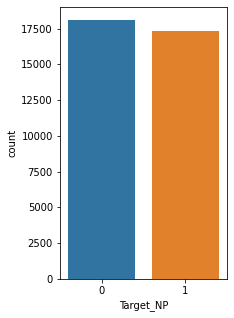

In [ ]:
plt.figure(figsize=(3,5))
sns.countplot(data=df_all, x='Target_NP')

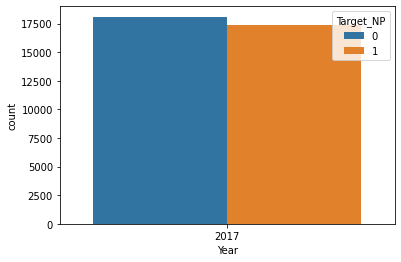

In [ ]:
sns.countplot(data=df_all, x='Year', hue='Target_NP')

In [ ]:
df_merge_date['SecuritiesCode'].nunique()

2000

In [ ]:
df_2021 = df_all[df_all['Year']==2021]
df_n2021 = df_all[df_all['Year']!=2021]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df_n2021.dropna().drop(['Target_NP', 'Target'], axis=1)
y = df_n2021.dropna()['Target_NP']

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.4, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_val, y_val, test_size=0.5, random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(21196, 10)
(7065, 10)
(7066, 10)


### K-Nearest Neighbors (KNN)

#### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_x_train = scaler.fit_transform(x_train)
scaled_x_val = scaler.transform(x_val)
scaled_x_test = scaler.transform(x_test)

#### Build the model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(scaled_x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

#### Evaluation

K = 1, accuracy = 0.60

In [ ]:
y_pred = knn_model.predict(scaled_x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [ ]:
a_k1 = accuracy_score(y_test, y_pred)
a_k1

0.6059447983014862

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.61      0.61      3638
           1       0.59      0.61      0.60      3427

    accuracy                           0.61      7065
   macro avg       0.61      0.61      0.61      7065
weighted avg       0.61      0.61      0.61      7065



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


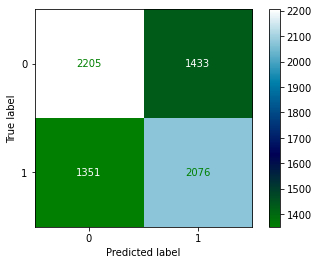

In [ ]:
plot_confusion_matrix(knn_model, scaled_x_test, y_test, cmap='ocean')

#### Elbow Method

K = 16 accuracy = 0.56

In [ ]:
test_error_rates = []

for k in range(1,31):
  knn_modelx = KNeighborsClassifier(n_neighbors=k)
  knn_modelx.fit(scaled_x_train, y_train)
  y_predx = knn_modelx.predict(scaled_x_test)
  test_error_rates += [(1-accuracy_score(y_test, y_predx))]

Text(0.5, 0, 'K Neighbors')

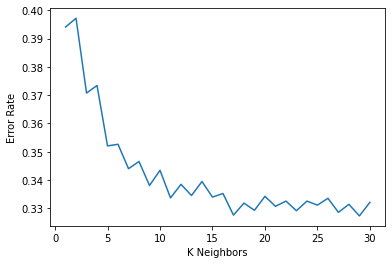

In [ ]:
plt.plot(range(1,31), test_error_rates)
plt.ylabel('Error Rate')
plt.xlabel('K Neighbors')

In [ ]:
knn_model21 = KNeighborsClassifier(n_neighbors=17)
knn_model21.fit(scaled_x_train, y_train)
y_pred21 = knn_model21.predict(scaled_x_test)

0.6724699221514508
              precision    recall  f1-score   support

           0       0.69      0.66      0.68      3638
           1       0.66      0.68      0.67      3427

    accuracy                           0.67      7065
   macro avg       0.67      0.67      0.67      7065
weighted avg       0.67      0.67      0.67      7065



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


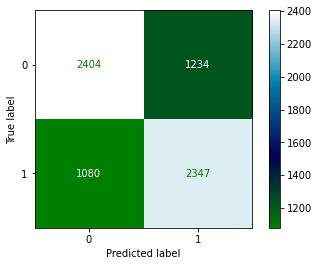

In [ ]:
a_kb = accuracy_score(y_test, y_pred21)

print(a_kb)

print(classification_report(y_test, y_pred21))

plot_confusion_matrix(knn_model21, scaled_x_test, y_test, cmap='ocean')

### Decision Tree Classifier Model

#### Create the Decision Tree Classifier Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(x_train, y_train)
base_preds = tree_clf.predict(x_test)

In [ ]:
base_preds

array([0, 1, 0, ..., 0, 0, 1])

#### Display the result

In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [ ]:
a_dt = accuracy_score(y_test, base_preds)

print(classification_report(y_test, base_preds))

              precision    recall  f1-score   support

           0       0.62      0.60      0.61      3638
           1       0.59      0.61      0.60      3427

    accuracy                           0.60      7065
   macro avg       0.60      0.60      0.60      7065
weighted avg       0.60      0.60      0.60      7065



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


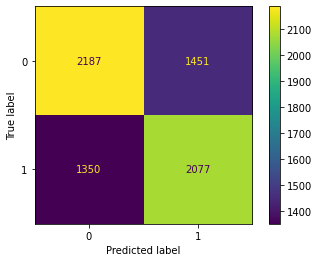

In [ ]:
plot_confusion_matrix(tree_clf, x_test, y_test)

In [ ]:
tree_clf.feature_importances_

array([0.12827918, 0.12588846, 0.13258141, 0.12103403, 0.29842739,
       0.1197336 , 0.        , 0.        , 0.        , 0.07405592])

In [ ]:
pd.DataFrame(index = x.columns, data = tree_clf.feature_importances_, columns = ['feature_importances'])

,feature_importances
Open,0.128279
High,0.125888
Low,0.132581
Close,0.121034
Volume,0.298427
Day,0.119734
Month,0.000000
Year,0.000000
Quarter,0.000000
Day of Week,0.074056


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rforest_model = RandomForestClassifier(n_estimators=10, max_features='auto', random_state=101)

In [ ]:
rforest_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [ ]:
y_pred = rforest_model.predict(x_test)

In [ ]:
a_rf = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.68      0.66      3638
           1       0.64      0.60      0.62      3427

    accuracy                           0.64      7065
   macro avg       0.64      0.64      0.64      7065
weighted avg       0.64      0.64      0.64      7065



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


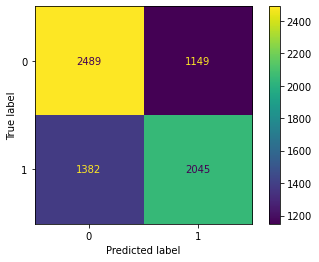

In [ ]:
plot_confusion_matrix(rforest_model, x_test, y_test)

### Artificial Neural Network(ANN) for binary classification

#### Normal ANN

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x_train)

X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(5, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
model.fit(x=X_train, y=y_train, batch_size=64, epochs=250, validation_data=(X_test, y_test))

Epoch 1/250
332/332 [==============================] - 2s 2ms/step - loss: 0.6916 - val_loss: 0.6882
Epoch 2/250
332/332 [==============================] - 1s 2ms/step - loss: 0.6837 - val_loss: 0.6774
Epoch 3/250
332/332 [==============================] - 1s 2ms/step - loss: 0.6764 - val_loss: 0.6712
Epoch 4/250
332/332 [==============================] - 1s 2ms/step - loss: 0.6713 - val_loss: 0.6667
Epoch 5/250
332/332 [==============================] - 1s 2ms/step - loss: 0.6686 - val_loss: 0.6650
Epoch 6/250
332/332 [==============================] - 1s 2ms/step - loss: 0.6672 - val_loss: 0.6634
Epoch 7/250
332/332 [==============================] - 1s 2ms/step - loss: 0.6665 - val_loss: 0.6629
Epoch 8/250
332/332 [==============================] - 1s 2ms/step - loss: 0.6663 - val_loss: 0.6624
Epoch 9/250
332/332 [==============================] - 1s 2ms/step - loss: 0.6661 - val_loss: 0.6622
Epoch 10/250
332/332 [==============================] - 1s 2ms/step - loss: 0.6661 - val_lo

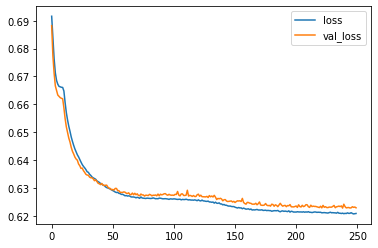

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

#### EarlyStopping

In [ ]:
model = Sequential()

model.add(Dense(5, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
model.fit(x=X_train, y=y_train, batch_size=64, epochs=250, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/250
332/332 [==============================] - 1s 2ms/step - loss: 0.6786 - val_loss: 0.6734
Epoch 2/250
332/332 [==============================] - 1s 2ms/step - loss: 0.6733 - val_loss: 0.6699
Epoch 3/250
332/332 [==============================] - 1s 2ms/step - loss: 0.6712 - val_loss: 0.6690
Epoch 4/250
332/332 [==============================] - 1s 3ms/step - loss: 0.6703 - val_loss: 0.6676
Epoch 5/250
332/332 [==============================] - 1s 2ms/step - loss: 0.6700 - val_loss: 0.6673
Epoch 6/250
332/332 [==============================] - 1s 2ms/step - loss: 0.6698 - val_loss: 0.6673
Epoch 7/250
332/332 [==============================] - 1s 2ms/step - loss: 0.6697 - val_loss: 0.6687
Epoch 8/250
332/332 [==============================] - 1s 2ms/step - loss: 0.6698 - val_loss: 0.6672
Epoch 9/250
332/332 [==============================] - 1s 2ms/step - loss: 0.6697 - val_loss: 0.6671
Epoch 10/250
332/332 [==============================] - 1s 2ms/step - loss: 0.6697 - val_lo

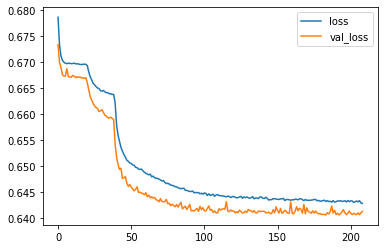

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

#### Dropout Layers + EarlyStopping

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()

model.add(Dense(5, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
model.fit(x=X_train, y=y_train, batch_size=64, epochs=500, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/500
332/332 [==============================] - 1s 2ms/step - loss: 0.6938 - val_loss: 0.6928
Epoch 2/500
332/332 [==============================] - 1s 2ms/step - loss: 0.6927 - val_loss: 0.6925
Epoch 3/500
332/332 [==============================] - 1s 2ms/step - loss: 0.6926 - val_loss: 0.6922
Epoch 4/500
332/332 [==============================] - 1s 2ms/step - loss: 0.6920 - val_loss: 0.6909
Epoch 5/500
332/332 [==============================] - 1s 2ms/step - loss: 0.6907 - val_loss: 0.6890
Epoch 6/500
332/332 [==============================] - 1s 2ms/step - loss: 0.6909 - val_loss: 0.6884
Epoch 7/500
332/332 [==============================] - 1s 2ms/step - loss: 0.6896 - val_loss: 0.6884
Epoch 8/500
332/332 [==============================] - 1s 2ms/step - loss: 0.6900 - val_loss: 0.6870
Epoch 9/500
332/332 [==============================] - 1s 2ms/step - loss: 0.6907 - val_loss: 0.6883
Epoch 10/500
332/332 [==============================] - 1s 2ms/step - loss: 0.6902 - val_lo

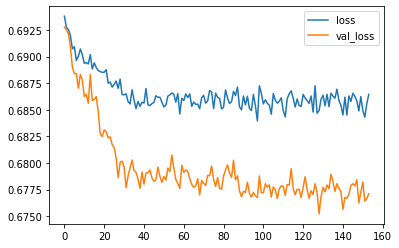

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

#### Predict the test data and evaluate the model(Dropout + EarlyStopping)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred = (y_pred > 0.5)

In [ ]:
y_pred

array([[False],
       [ True],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[3107,  531],
       [2100, 1327]])

In [ ]:
a_nn = accuracy_score(y_test, y_pred)
a_nn

0.6276008492569002

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 55        
                                                                 
 dropout (Dropout)           (None, 5)                 0         
                                                                 
 dense_7 (Dense)             (None, 2)                 12        
                                                                 
 dropout_1 (Dropout)         (None, 2)                 0         
                                                                 
 dense_8 (Dense)             (None, 1)                 3         
                                                                 
Total params: 70
Trainable params: 70
Non-trainable params: 0
_________________________________________________________________


### Accuracy Table

In [ ]:
# list_accuracy = [a_k1, a_kb, a_dt, a_dt_f, a_rf, a_nn]
list_accuracy = [a_k1, a_kb, a_dt, None, a_rf, a_nn]

list_model = ['K-Nearest Neighbors (K=1)', 'K-Nearest Neighbors (K=17)', 'Decision Tree (fully grown)', 'Decision Tree (pruned)', 'Random Forest', 'Artificial Neural Network']

dic_accuracy = dict(zip(list_model, list_accuracy))

df_accuracy = pd.DataFrame(dic_accuracy.items(), columns=['Model', 'Accuracy'])

In [ ]:
df_accuracy

,Model,Accuracy
0,K-Nearest Neighbors (K=1),0.605945
1,K-Nearest Neighbors (K=17),0.672470
2,Decision Tree (fully grown),0.603539
3,Decision Tree (pruned),NaN
4,Random Forest,0.641755
5,Artificial Neural Network,0.627601


## Modeling (Multiple Linear Regression)

Using Multiple Linear Regression to predic the target rate

### Import and Split the Dataset

In [6]:
df_merge_date = pd.read_csv('df_merge_date.csv')

df_all = df_merge_date[list(df_merge_date.columns[3:9]) + list(df_merge_date.columns[-6:-1])].dropna()
df_all

,Open,High,Low,Close,Volume,Target,Day,Month,Year,Quarter,Day of Week
0,2734.0,2755.0,2730.0,2742.0,31400,0.000730,4.0,1.0,2017.0,1.0,2.0
1,568.0,576.0,563.0,571.0,2798500,0.012324,4.0,1.0,2017.0,1.0,2.0
2,3150.0,3210.0,3140.0,3210.0,270800,0.006154,4.0,1.0,2017.0,1.0,2.0
3,1510.0,1550.0,1510.0,1550.0,11300,0.011053,4.0,1.0,2017.0,1.0,2.0
4,3270.0,3350.0,3270.0,3330.0,150800,0.003026,4.0,1.0,2017.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
1634850,3600.0,3690.0,3530.0,3530.0,74700,0.028832,1.0,7.0,2020.0,3.0,2.0
1634851,2870.0,2947.0,2828.0,2834.0,159100,0.021436,1.0,7.0,2020.0,3.0,2.0
1634852,3390.0,3640.0,3370.0,3570.0,2747100,0.039773,1.0,7.0,2020.0,3.0,2.0
1634853,2310.0,2383.0,2299.0,2301.0,156000,0.042254,1.0,7.0,2020.0,3.0,2.0


In [7]:
df_all = df_all[(df_all['Year'] == 2017) & (df_all['Month'] == 1)]
df_all

,Open,High,Low,Close,Volume,Target,Day,Month,Year,Quarter,Day of Week
0,2734.0,2755.0,2730.0,2742.0,31400,0.000730,4.0,1.0,2017.0,1.0,2.0
1,568.0,576.0,563.0,571.0,2798500,0.012324,4.0,1.0,2017.0,1.0,2.0
2,3150.0,3210.0,3140.0,3210.0,270800,0.006154,4.0,1.0,2017.0,1.0,2.0
3,1510.0,1550.0,1510.0,1550.0,11300,0.011053,4.0,1.0,2017.0,1.0,2.0
4,3270.0,3350.0,3270.0,3330.0,150800,0.003026,4.0,1.0,2017.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
35430,1133.0,1259.0,1133.0,1227.0,361900,-0.000836,31.0,1.0,2017.0,1.0,1.0
35431,1038.0,1071.0,1028.0,1070.0,101700,-0.024871,31.0,1.0,2017.0,1.0,1.0
35432,1827.0,1845.0,1827.0,1840.0,1700,-0.006543,31.0,1.0,2017.0,1.0,1.0
35433,1712.0,1720.0,1707.0,1715.0,2300,-0.018182,31.0,1.0,2017.0,1.0,1.0


In [10]:
from sklearn.model_selection import train_test_split

In [13]:
x = df_all.drop(['Target'], axis=1)
y = df_all['Target']

In [14]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.4, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_val, y_val, test_size=0.5, random_state=42)

In [15]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(21196, 10)
(7065, 10)
(7066, 10)


### Building the Multiple Linear Regression Model

In [16]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [17]:
lm.intercept_

0.005273016475932414

In [18]:
lm.coef_

array([-7.30024211e-06,  1.16562759e-05,  4.80677613e-06, -9.30016567e-06,
        4.21455776e-12, -2.57637039e-05,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -2.39330634e-03])

In [19]:
from sklearn import metrics

y_pred = lm.predict(x_test)

rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse_test

0.01921793857883846

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


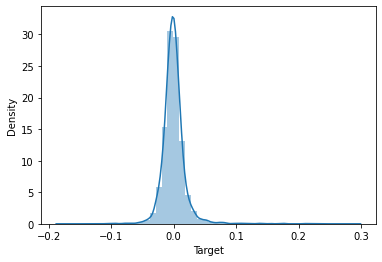

In [23]:
sns.distplot(y_test-y_pred)

### Evaluating the performance

In [25]:
from sklearn import metrics

In [28]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.01921793857883846

In [29]:
metrics.r2_score(y_test, y_pred)

0.025831108969090244

Since the r2 score is very low, we consider the MLR model is not good enough to make the prediction on the stock return rate. We need some more advanced, powerful model to help us make the prediction.